In [1]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
#import Extract_ncfile_save_fluxes_radiation
#import Reload_save_interpolated as svintp
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno
import netCDF4 as nc

BuRd = rcmap(cm.RdBu)

import hickle as hkl

#source_dirc=svintp.source
#exp_dirc=["aqua_2m/","aqua_20m/","land_rec20m/"]

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

# dirc=sys.argv

####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#source='/project2/tas1/pragallva/Fall_quarter_2017/post_process_data/land_realtest/'
source_dir='/project2/tas1/pragallva/Spring_quarter/post_process_data/'
source = source_dir+'aqua_2m/'
            
make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/")
make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/")

fig_dest="/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/"

a=6371.0e3
R=a

In [2]:
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

#### Invoke all the files

m5=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/*.hkl'))
m10=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca10m/*.hkl'))
m50=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca50m/*.hkl'))
m100=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/*.hkl'))

In [3]:
m100

['/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/temp_dic.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/flux_interp_dict.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/raw_data_dict.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/coord_dic.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/div_flux_dict.hkl']

In [4]:
t=0;f=1;r=2;c=3;d=4;

DEPTHS=[m5,m10,m50,m100]
flux=[]
div=[]
temp=[]
raw=[]
coord=load(m5[3])
for depth in DEPTHS:
    flux.append(load(depth[f]))
    div.append(load(depth[d])) 
    temp.append(load(depth[t]))
    raw.append(load(depth[r]))

In [12]:
raw[0].keys()

['Z', 'q', 'U', 'T', 'V', 'MSE', 'latn']

In [7]:
import scipy.io as sio

In [8]:
d5=0;d10=1;d50=2;d100=3

In [9]:
coord.keys()

['plev', 'lon', 'p_sfc', 'no_of_plevels', 'time', 'lat']

In [14]:
def save(X,name): 
    Y={'d5':X[d5], 'd10':X[d10],'d50':X[d50], 'd100':X[d100]}
    sio.savemat(name, Y)
dest= '/project2/tas1/pragallva/Spring_quarter_2018/MAT_files/'  
save(flux,dest+"FLUX_in_PW.mat")
save(div, dest+"DIV_in_W_m2.mat")
save(raw, dest+"RAW_data_all_levels.mat")
sio.savemat(dest+"coordinates.mat", coord)

KeyError: 0

In [18]:
div[d100]

{'MM': array([[  0.41500209,   2.28640314,   0.69399228, ...,  -5.4518161 ,
          -2.93354456,   7.4763118 ],
        [  0.55543999,   2.71645187,   0.8625408 , ...,  -6.41183591,
          -3.45194882,   8.98969487],
        [  0.71433127,   3.1366746 ,   1.04048164, ...,  -7.33194694,
          -3.95021196,  10.50907683],
        ..., 
        [ -1.53736145,   6.29578888,  -1.23699984, ...,   4.72549072,
          -4.19058514,   6.54663634],
        [ -1.30350837,   5.57514177,  -1.04675589, ...,   4.18071489,
          -3.6157278 ,   5.78969171],
        [ -1.08047532,   4.83747717,  -0.86488533, ...,   3.62332581,
          -3.05447459,   5.01661272]]),
 'MSE': array([[ -28.07381356,  -33.36830816,  -48.51839474, ...,  -55.9916558 ,
          -40.68130724,  -24.99793934],
        [ -33.65022363,  -39.98703734,  -58.14370764, ...,  -67.08059704,
          -48.7414919 ,  -29.96465623],
        [ -39.22080706,  -46.59553094,  -67.75444932, ...,  -78.14752711,
          -56.7871452

In [7]:
def M(X):
    #X=X-X.mean(axis=0)[None,:]
    return X

Iswabs=[]; Ishf=[]; Idhdt=[]; Iolr=[]; Ine=[]
for depth in range(4):
    Iswabs.append(M(flux[depth]['SWABS']))
    Ishf.append(M(flux[depth]['SHF']))
    Idhdt.append(M(flux[depth]['dhdt']))
    Iolr.append(M(flux[depth]['olr']))
    Ine.append(Iswabs[depth]+Ishf[depth]-Iolr[depth]-Idhdt[depth])

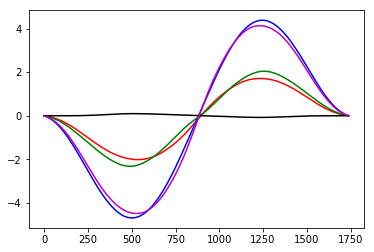

In [8]:
py.plot(Iswabs[0][:].mean(axis=1),'r-')
py.plot(Ishf[0][:].mean(axis=1),'b-')
py.plot(Iolr[0][:].mean(axis=1),'g-')
py.plot(Idhdt[0][:].mean(axis=1),'k-')
py.plot(Ine[0][:].mean(axis=1),'m-')

In [9]:
TE=[]; MM=[]; SE=[]; INE=[]
for depth in range(4):
    TE.append(M(flux[depth]['TE']))
    SE.append(M(flux[depth]['SE']))
    MM.append(M(flux[depth]['MM']))
    INE.append(TE[depth]+SE[depth]+MM[depth])

In [10]:
import scipy.integrate as integrate
def interad(x):
    l=np.deg2rad(lat[:,None])
    x=x*np.cos(l)
    #int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:])#int_x_r[:-1,:]) #int_x[::-1,:][1:,:]+
    return avg_int_r/10**15

In [11]:
div_TE=[]; div_MM=[]; div_SE=[]; div_NE=[];
swabs=[]; shf=[]; olr=[];dhdt=[];ne=[];

for depth in range(4):
    div_TE.append(div[depth]['TE'])
    div_SE.append(div[depth]['SE'])
    div_MM.append(div[depth]['MM'])
    div_NE.append(div_TE[depth]+div_SE[depth]+div_MM[depth])
    
    swabs.append(div[depth]['SWABS'])
    shf.append(div[depth]['SHF'])
    dhdt.append(div[depth]['dhdt'])
    olr.append(div[depth]['olr'])
    ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])

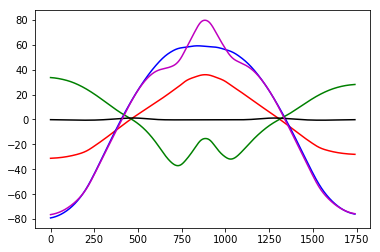

In [12]:
d=3
py.plot(swabs[d][:].mean(axis=1)-swabs[d].mean(),'r-')
py.plot(shf[d][:].mean(axis=1)-shf[d].mean(),'b-')
py.plot( -(olr[d][:].mean(axis=1)-olr[d].mean()),'g-')
py.plot(dhdt[d][:].mean(axis=1)-dhdt[d].mean(),'k-')
py.plot(ne[d][:].mean(axis=1)-ne[d].mean(),'m-')

In [13]:
lat=div[0]['latn']

from scipy.interpolate import interp1d
def find_zero(div,N=1):
  zero_loc = np.zeros(12)
  for m in range(0,12):
        if N==1 :
         l_range=((lat>=30) & (lat<=60))            
        else    :
         l_range=((lat>=-60) & (lat<=-30))                    
        interpolation_function = interp1d(div[l_range,m],lat[l_range],kind='linear')
        try :
            zero_loc[m]=interpolation_function(0)
        except ValueError as err:
            zero_loc[m]=np.nan

        
  return zero_loc

storm_pos_N=np.zeros((4,12)) ; storm_pos_S=np.zeros((4,12));
for d in range(4):
    storm_pos_N[d,:]=find_zero(div_TE[d],+1)
    storm_pos_S[d,:]=find_zero(div_TE[d],-1)

In [14]:
storm_pos_N

array([[ 38.29394349,  39.28976462,  42.27101371,  44.76472391,
         46.25543387,  46.39786526,  50.52080075,  49.94418563,
         53.51236902,  54.83090011,  53.05101589,  45.58147729],
       [ 41.62524218,  38.538253  ,  38.40021155,  39.23272829,
         39.72514928,  40.07108475,  44.61208297,  46.96139921,
         45.69199354,  44.41645952,  47.00746158,  45.27770983],
       [ 38.80772052,  39.0735893 ,  39.06786459,  39.28184642,
         38.85461673,  38.11473245,  37.22224051,  38.05583377,
         38.53759571,  38.34134361,  39.57667485,  39.40436726],
       [ 39.39074448,  39.99884714,  39.56107052,  39.38363875,
         38.37777456,  37.45884079,  37.06503458,  37.04977218,
         37.66777672,  38.54605366,  39.13229653,  39.24463545]])

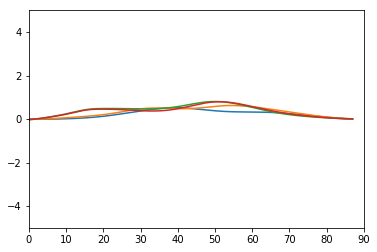

In [15]:
D=4
for d in range(D):
    py.plot(lat,SE[d].mean(axis=-1))
    py.xlim(0,90)
    py.ylim(-5,5)

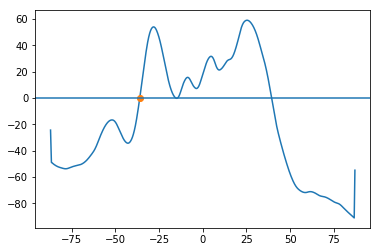

In [16]:
m=0
d=3
py.plot(lat,div_TE[d][:,m],'-')
py.plot(storm_pos_S[d,m],0,'o')
py.axhline(0)

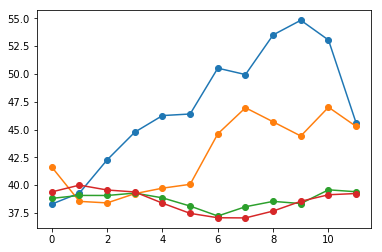

In [17]:
# py.figure(1)
for d in range(4):
    py.plot(storm_pos_N[d,:],'o-')
    #py.plot(-storm_pos_S[d,:],'o--')
py.show()

In [18]:
def plot_flux(n,d) :
    
    if d==0:depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100

    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def add(y):
       y1 = np.append(y,y[:,0,np.newaxis],axis=1)
       return y1    
    
    def a(y):
       y1 = np.append(y,y[0])
       return y1 
    
    v = np.arange(-12.0, 13.0, 2.0)
    latns=lat
    py.subplot(220+n)
    b = py.contourf(range(13),latns,add(TE[d]), v, cmap=BuRd); 
    # py.colorbar()
    c=py.contour(range(13),latns, add(TE[d]), v, colors='k',linewidths=1.0);
    
    py.plot(range(13), a(storm_pos_N[d,:]), 'ro-')
    py.plot(range(13), a(storm_pos_S[d,:]), 'bo-')
    
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
    py.ylim(-80,80)
    #py.plot(range(13),add2(zero_F_TE_N[:-1]),'ro-',lw=5.8,ms=10)
    py.xticks(range(13), (mticks),fontsize=15)
    py.yticks(range(-80,81,20),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title(str(depth)+' m',fontsize=30)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
#     py.savefig(fig_dest+title+'_flux.pdf')
    #print fig_dest+title+'_flux.pdf'
    #py.show()

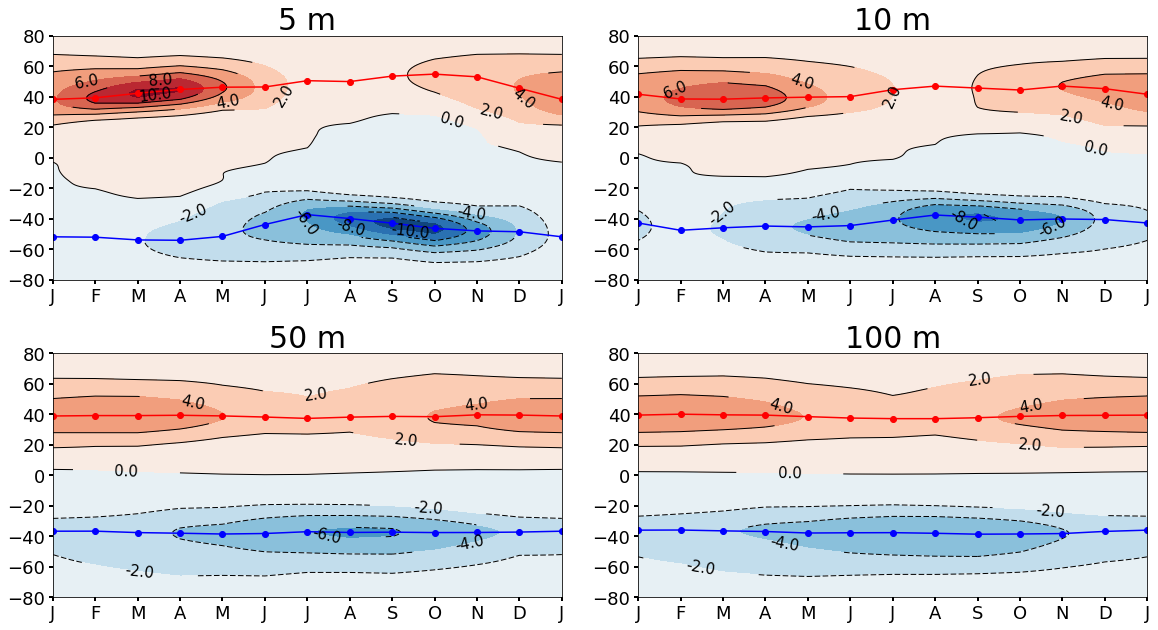

In [19]:
fig=py.figure(figsize=(20, 10))
d=0
plot_flux(d+1,d)
d=1
plot_flux(d+1,d)
d=2
plot_flux(d+1,d)
d=3
plot_flux(d+1,d)

In [20]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,d,N=1):
  D = np.zeros(12)
  for m in range(0,12):
        if N==1 :
          l_range=((lat>=30) & (lat<=60)) 
          X=storm_pos_N
        else    :
          l_range=((lat>=-60) & (lat<=-30))  
          X=storm_pos_S
        interpolation_function = interp1d(lat[l_range],flux[d][l_range,m],kind='cubic')
        try :
            D[m]=interpolation_function(X[d,m])
        except ValueError as err:
            D[m]==np.nan        
  return D

Intensity_teN=np.copy(storm_pos_N)
Intensity_seN=np.copy(storm_pos_N)
Intensity_mmN=np.copy(storm_pos_N)
Intensity_neN=np.copy(storm_pos_N)
for d in range(4):
    Intensity_teN[d,:]=inerp_at_max(TE,d,N=1)
    Intensity_seN[d,:]=inerp_at_max(SE,d,N=1)
    Intensity_mmN[d,:]=inerp_at_max(MM,d,N=1)
    Intensity_neN[d,:]=inerp_at_max(INE,d,N=1)

In [21]:
Intensity_teS=np.copy(storm_pos_S)
Intensity_seS=np.copy(storm_pos_S)
Intensity_mmS=np.copy(storm_pos_S)
Intensity_neS=np.copy(storm_pos_S)
for d in range(4):
    Intensity_teS[d,:]=inerp_at_max(TE,d,N=-1)
    Intensity_seS[d,:]=inerp_at_max(SE,d,N=-1)
    Intensity_mmS[d,:]=inerp_at_max(MM,d,N=-1)
    Intensity_neS[d,:]=inerp_at_max(INE,d,N=-1)

1


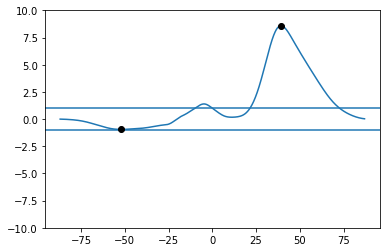

In [22]:
m=m+1
d=0
py.plot(lat, TE[d][:,m])
py.axhline(1)
py.axhline(-1)
py.plot(storm_pos_N[d,m],Intensity_teN[d,m],'ko' )
py.plot(storm_pos_S[d,m],Intensity_teS[d,m],'ko' )
py.ylim(-10,10)
print m

In [23]:
def threshold(N, S, pos_N, pos_S):
   p_N=np.copy(pos_N)
   p_S=np.copy(pos_S)
   for d in range(4): 
    for m in range(12):
        if (N[d,m]<+1) :
            p_N[d,m]=np.nan            
        if (S[d,m]>-1) :
            p_S[d,m]=np.nan            
    return p_N, p_S

pos_N, pos_S = threshold(Intensity_teN, Intensity_teS, storm_pos_N, storm_pos_S)            

In [24]:
pos_N

array([[ 38.29394349,  39.28976462,  42.27101371,  44.76472391,
         46.25543387,  46.39786526,          nan,          nan,
         53.51236902,  54.83090011,  53.05101589,  45.58147729],
       [ 41.62524218,  38.538253  ,  38.40021155,  39.23272829,
         39.72514928,  40.07108475,  44.61208297,  46.96139921,
         45.69199354,  44.41645952,  47.00746158,  45.27770983],
       [ 38.80772052,  39.0735893 ,  39.06786459,  39.28184642,
         38.85461673,  38.11473245,  37.22224051,  38.05583377,
         38.53759571,  38.34134361,  39.57667485,  39.40436726],
       [ 39.39074448,  39.99884714,  39.56107052,  39.38363875,
         38.37777456,  37.45884079,  37.06503458,  37.04977218,
         37.66777672,  38.54605366,  39.13229653,  39.24463545]])

In [25]:
def plot_flux(n,d,N) :
    
    pos_N, pos_S = threshold(Intensity_teN, Intensity_teS, storm_pos_N, storm_pos_S)
    
    if d==0:depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100

    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def add(y):
       y1 = np.append(y,y[:,0,np.newaxis],axis=1)
       return y1    
    
    def a(y):
       y1 = np.append(y,y[0])
       return y1 
    
    v = np.arange(-12.0, 13.0, 1.0)
    latns=lat
    py.subplot(220+n)
    b = py.contourf(range(13),latns,add(TE[d]), v, cmap=BuRd); 
    # py.colorbar()
    c=py.contour(range(13),latns, add(TE[d]), v, colors='k',linewidths=1.0);
    
    py.plot(range(13), a(pos_N[d,:]), 'ro-')
    py.plot(range(13), a(pos_S[d,:]), 'bo-')
    
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
    
    #py.plot(range(13),add2(zero_F_TE_N[:-1]),'ro-',lw=5.8,ms=10)
    py.xticks(range(13), (mticks),fontsize=15)
    py.yticks(range(-80,81,20),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title(str(depth)+' m',fontsize=30)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
    if N==1 :
        py.ylim(0,80)
    if N==-1 :
        py.ylim(-80,0)
#     py.savefig(fig_dest+title+'_flux.pdf')
    #print fig_dest+title+'_flux.pdf'
    #py.show()

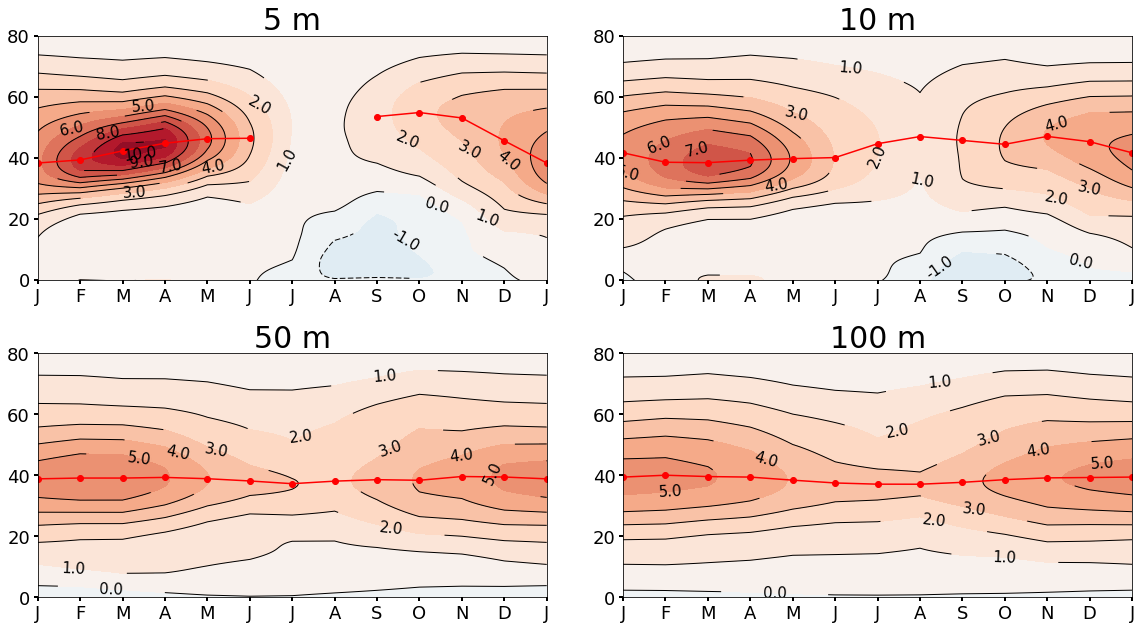

In [26]:
fig=py.figure(figsize=(20, 10))
d=0
plot_flux(d+1,d,1)
d=1
plot_flux(d+1,d,1)
d=2
plot_flux(d+1,d,1)
d=3
plot_flux(d+1,d,1)

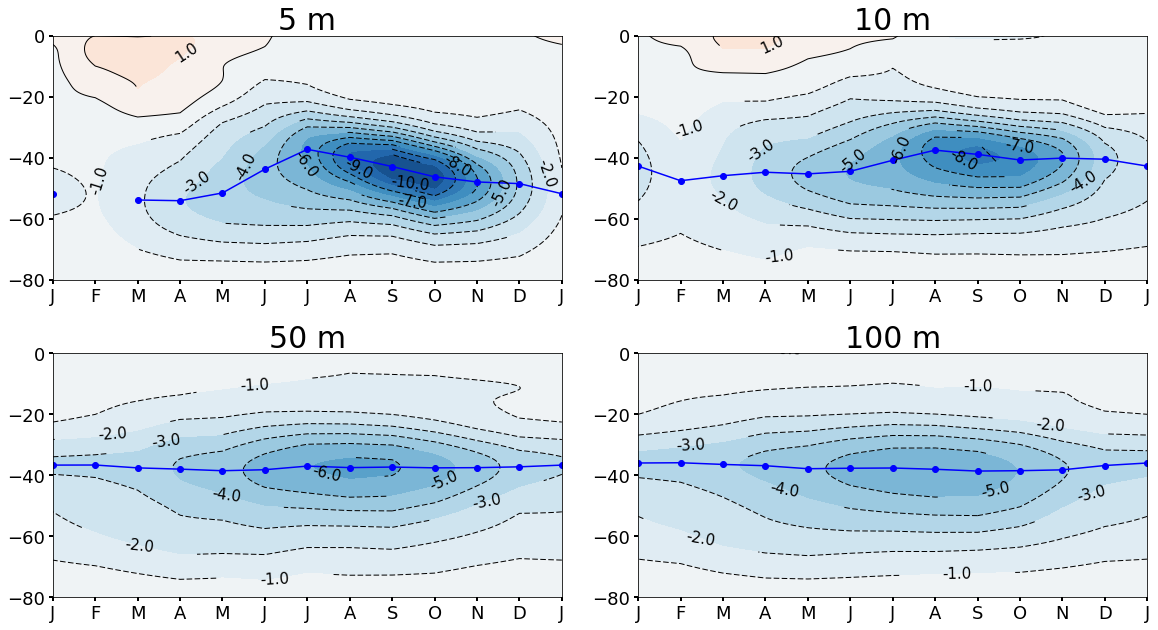

In [27]:
fig=py.figure(figsize=(20, 10))
d=0
plot_flux(d+1,d,-1)
d=1
plot_flux(d+1,d,-1)
d=2
plot_flux(d+1,d,-1)
d=3
plot_flux(d+1,d,-1)

2


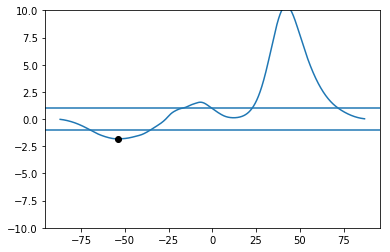

In [28]:
m=m+1
d=0
py.plot(lat, TE[d][:,m])
py.axhline(1)
py.axhline(-1)
py.plot(storm_pos_N[d,m],Intensity_teN[d,m],'ko' )
py.plot(storm_pos_S[d,m],Intensity_teS[d,m],'ko' )
py.ylim(-10,10)
print m

In [29]:
def interp_rad(rad,N=1):
  D = np.zeros((4,12))
  for m in range(0,12):
       for d in range(0,4) :
            latr=lat[1:-1]
            if N==1 :
              l_range=((latr>=30) & (latr<=70)) 
              X=storm_pos_N
            else    :
              l_range=((latr>=-70) & (latr<=-30))  
              X=storm_pos_S
            interpolation_function = interp1d(latr[l_range],rad[d][l_range,m],kind='cubic')
            try :
                D[d,m]=interpolation_function(X[d,m])
            except ValueError as err:
                D[d,m]==np.nan        
  return D

In [30]:
I_SWAB_N =interp_rad((Iswabs),N=1)
I_SHF_N  =interp_rad((Ishf),N=1)
I_NE_N   =interp_rad((Ine),N=1)
I_OLR_N  =interp_rad((Iolr),N=1)
I_dhdt_N =interp_rad((Idhdt),N=1)

In [31]:
I_SWAB_S =interp_rad((Iswabs),N=-1)
I_SHF_S  =interp_rad((Ishf),N=-1)
I_NE_S  =interp_rad((Ine),N=-1)
I_OLR_S  =interp_rad((Iolr),N=-1)
I_dhdt_S =interp_rad((Idhdt),N=-1)

1


(0, 90)

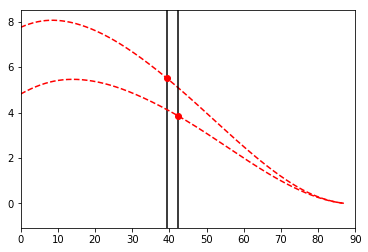

In [32]:
m=1
print m
py.plot(lat[1:-1],M(Iswabs)[0][:,m],'r--')
py.axvline(storm_pos_N[0,m],color='k')
py.plot(storm_pos_N[0,m],I_SWAB_N[0,m],'ro')

py.plot(lat[1:-1],M(Iswabs)[0][:,m+1],'r--')
py.axvline(storm_pos_N[0,m+1],color='k')
py.plot(storm_pos_N[0,m+1],I_SWAB_N[0,m+1],'ro')

py.xlim(0,90)


In [33]:
### radiation

def D(y,d):
    y1=np.append(y,y[:,0,np.newaxis],axis=1)
    x1=y1[d,1:]-y1[d,:-1]
    x2=np.append(x1[-1],x1)
    return x2


In [34]:
def plot_delta_NE(d,N,l):
    
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    fig=py.figure(figsize=(15, 9))        
    if N==1 :    
        py.plot(D(I_NE_N,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)
        py.plot(D(I_SWAB_N,d),'ro-',label=r'$\Delta I_{SWABS}$',lw=2.5)
        py.plot(D(I_SHF_N,d),'bo-',label=r'$\Delta I_{SHF}$',lw=2.5)
        py.plot(D(-I_OLR_N,d),'go-',label=r'$ - \Delta I_{OLR}$',lw=2.5) 
        #py.plot(D(Intensity_teN,d),'mo--',label=r'$\Delta I$',lw=2.5)
        
        py.plot(D(-I_dhdt_N,d),'ko-',label=r'$ - \Delta I_{\frac{dh}{dt}}$',lw=2.5) 
    
    if N==-1 :
        py.plot(D(I_NE_S,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)
        py.plot(D(I_SWAB_S,d),'ro-',label=r'$\Delta I_{SWABS}$',lw=2.5)
        py.plot(D(I_SHF_S,d),'bo-',label=r'$\Delta I_{SHF}$',lw=2.5)
        py.plot(D(-I_OLR_S,d),'go-',label=r'$ - \Delta I_{OLR}$',lw=2.5) 
        py.plot(D(-I_dhdt_S,d),'ko-',label=r'$ - \Delta I_{\frac{dh}{dt}}$',lw=2.5)
        #py.plot(D(Intensity_teS,d),'mo--',label=r'$\Delta I$',lw=2.5)
        
    py.axhline(0, color='k',linewidth=1.5)
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    if N==1:
        H="NH"
    else :
        H="SH"
    title="NE decomposition"+" "+H+" ("+str(depth)+"m)"
    title1="NE_decomposition_"+H+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-0.3, 0.3, facecolor='0.5', alpha=0.3)
    py.legend(fontsize=25,ncol=3,frameon=False, loc='best')
    
   # py.savefig(fig_dest+title1+'.pdf')
    print fig_dest+title1+'.pdf'

    
    py.tight_layout()

/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/NE_decomposition_NH_100m.pdf


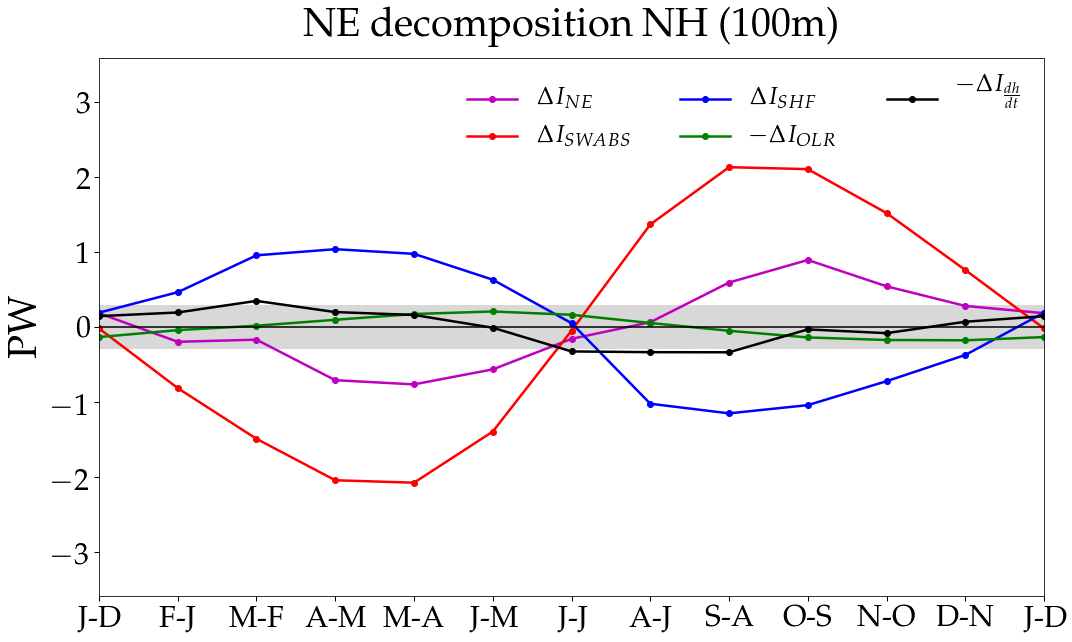

In [35]:
d=3;l=3.6
plot_delta_NE(d,1,l)

/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/NE_decomposition_SH_100m.pdf


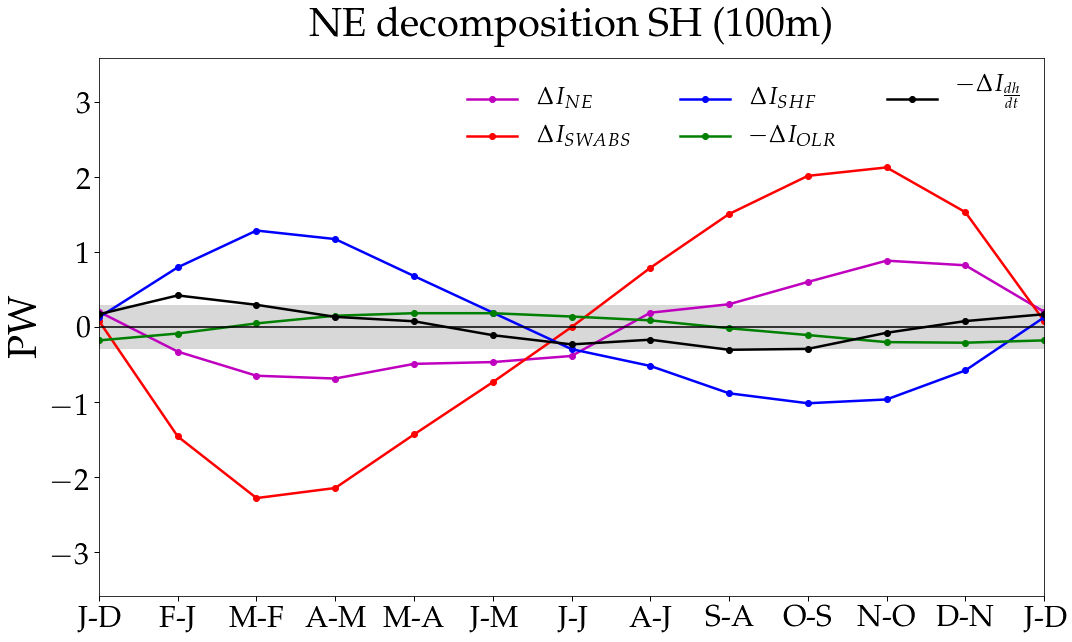

In [36]:
plot_delta_NE(d,-1,l)

2


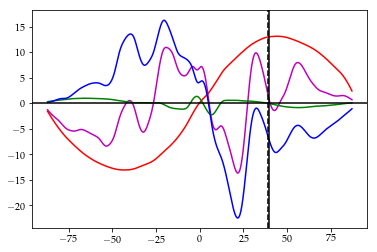

In [200]:
d=3;#m=m+1
m=m+1
def D(Y):
    X=Y*np.cos(np.deg2rad(lat))[:,None]  # -np.average(Y,axis=0,weights=np.cos(np.deg2rad(lat)))
    X=X-X.mean(axis=0)
    return X[:,1:]-X[:,:-1]

py.plot(lat,D(ne[d])[:,m],'m-')
py.plot(lat,D(swabs[d])[:,m],'r-')
py.plot(lat,D(-olr[d])[:,m],'g-')
py.plot(lat,D(shf[d])[:,m],'b-')

py.axvline(storm_pos_N[d,m],color='k')
py.axvline(storm_pos_N[d,m+1],color='k',ls='--')
py.axhline(0,color='k')
print m

In [201]:
### radiation

def D(y,d):
    y1=np.append(y,y[:,0,np.newaxis],axis=1)
    x1=y1[d,1:]-y1[d,:-1]
    x2=np.append(x1[-1],x1)
    return x2

def plot_intensity(d,N,l):
    
    if d==0: depth=5
    if d==1: depth=10
    if d==2: depth=50
    if d==3: depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    fig=py.figure(figsize=(15, 9))        
    if N==1 :    
        py.plot(D(Intensity_teN,d),'ro-',label=r'$\Delta I$',lw=2.5)
        py.plot(D(Intensity_neN,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)   
        py.plot(-D(Intensity_seN,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=2.5)
        py.plot(-D(Intensity_mmN,d),'go-',label=r'$ - \Delta I_{MM}$',lw=2.5)
        #py.plot(D(Intensity_teN+Intensity_seN+Intensity_mmN,d),'yo--',label="tot",lw=2.5)     
    if N==-1 :
        py.plot(D(Intensity_teS,d),'ro-',label=r'$\Delta I$',lw=2.5)
        py.plot(D(Intensity_neS,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)
        py.plot(-D(Intensity_seS,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=2.5)
        py.plot(-D(Intensity_mmS,d),'go-',label=r'$ - \Delta I_{MM}$',lw=2.5)
                                 
    py.axhline(0, color='k',linewidth=1.5)
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    if N==1:
        H="NH"
    else :
        H="SH"
    title="Intensity decomposition"+" "+H+" ("+str(depth)+"m)"
    title1="Intensity_decomposition_"+H+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-0.5, 0.5, facecolor='0.5', alpha=0.3)
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    #py.savefig(fig_dest+title1+'.pdf')
    print fig_dest+title1+'.pdf'    
    py.tight_layout()

/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/Intensity_decomposition_SH_100m.pdf


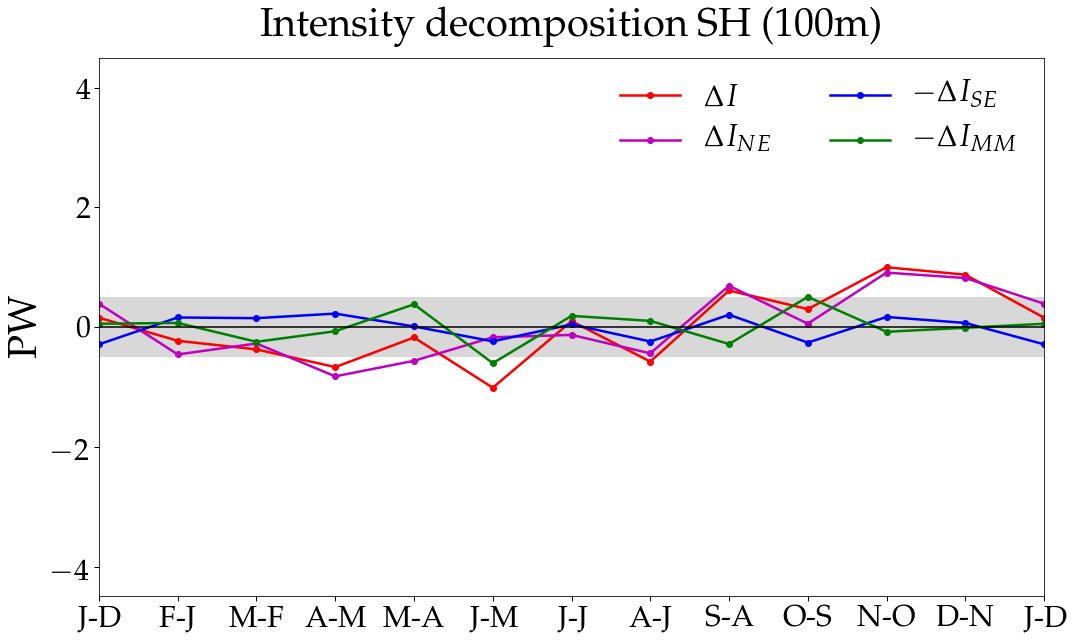

In [202]:
d=3;N=-1;l=4.5
plot_intensity(d,N,l)

/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/Intensity_decomposition_NH_100m.pdf


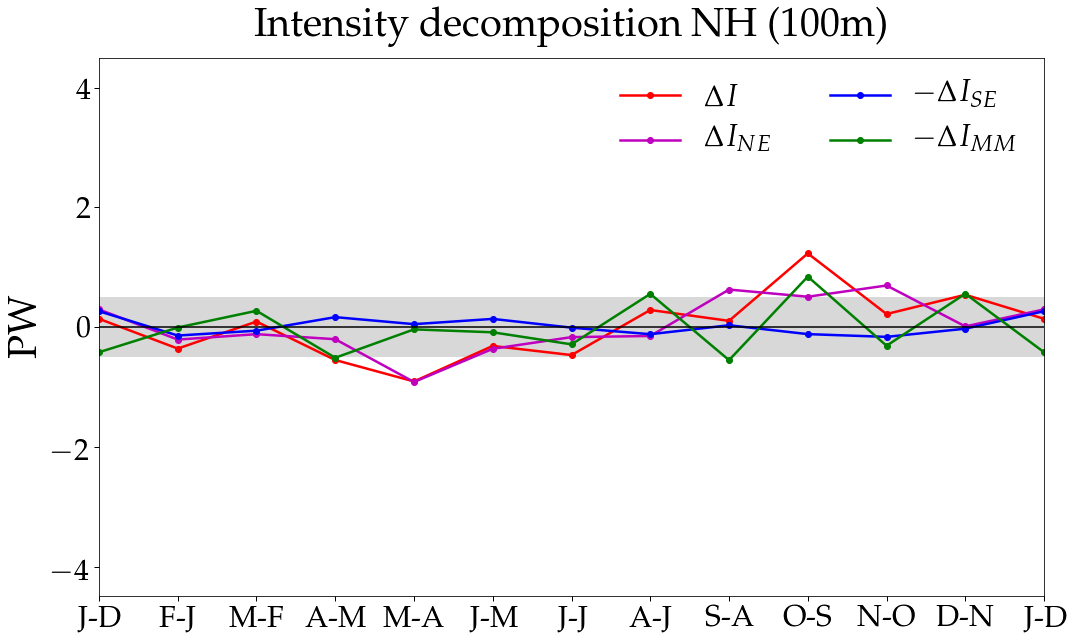

In [203]:
d=3;N=1;l=4.5
plot_intensity(d,N,l)

# Storm track shift decomposition

In [204]:
SE_change=np.zeros((4,len(lat),13))
MM_change=np.zeros((4,len(lat),13))
TE_change=np.zeros((4,len(lat),13))
NE_change=np.zeros((4,len(lat),13))

def calculate_shift_just_by_adding_individual_flux_divergences():
    
    se=np.array(div_SE); te=np.array(div_TE); mm=np.array(div_MM); ne=np.array(div_NE)
    
    div_se=np.append(se,se[:,:,0,np.newaxis],axis=2)
    div_mm=np.append(mm,mm[:,:,0,np.newaxis],axis=2)
    div_te=np.append(te,te[:,:,0,np.newaxis],axis=2)
    div_ne=np.append(ne,ne[:,:,0,np.newaxis],axis=2)
    
    for month in range(0,12):

        del_div_SE1=div_se[:,:,month+1]-div_se[:,:,month]
        del_div_MM1=div_mm[:,:,month+1]-div_mm[:,:,month]
        del_div_TE1=div_te[:,:,month+1]-div_te[:,:,month]
        del_div_NE1=div_ne[:,:,month+1]-div_ne[:,:,month]
        
        SE_change[:,:,month+1]=te[:,:,month]-del_div_SE1
        MM_change[:,:,month+1]=te[:,:,month]-del_div_MM1
        TE_change[:,:,month+1]=te[:,:,month]+del_div_TE1
        NE_change[:,:,month+1]=te[:,:,month]+del_div_NE1

    SE_change[:,:,0]=SE_change[:,:,12]
    TE_change[:,:,0]=TE_change[:,:,12]
    MM_change[:,:,0]=MM_change[:,:,12]
    NE_change[:,:,0]=NE_change[:,:,12]
    return SE_change, MM_change, TE_change, NE_change

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences()

In [205]:
# storm_pos_N=np.zeros((4,12)) ; storm_pos_S=np.zeros((4,12));
# for d in range(4):
#     storm_pos_N[d,:]=find_zero(div_TE[d,...],+1)
#     storm_pos_S[d,:]=find_zero(div_TE[d,...],-1)

from scipy.interpolate import interp1d
def find_zero(div,N=1):
  zero_loc = np.zeros(13)
  for m in range(0,13):
        if N==1 :
         l_range=((lat>=32) & (lat<=70))            
        else    :
         l_range=((lat>=-70) & (lat<=-32))                    
        interpolation_function = interp1d(div[l_range,m],lat[l_range],kind='linear')
        try :
            zero_loc[m]=interpolation_function(0)
        except ValueError as err:
            zero_loc[m]=np.nan
        
  return zero_loc

def plot_monthly_shift_method2(N,d,l) :
        
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    zero_div_TE=find_zero(TE_change[d,...],N)
    zero_div_SE=find_zero(SE_change[d,...],N)
    zero_div_MM=find_zero(MM_change[d,...],N)
    zero_div_NE=find_zero(NE_change[d,...],N)
    
    if N==1 :
        I=Intensity_teN
    if N==-1 :
        I=Intensity_teS
        
    def threshold(I, pos1, pos2, pos3, pos4):
        I=np.append(I[-1],I)
        for m in range(13):
            if (np.abs(I[m])<+1) :
                #N[d,m]=np.nan
                pos1[m]=np.nan
                pos2[m]=np.nan
                pos3[m]=np.nan
                pos4[m]=np.nan                
#                 print ok
        return pos1, pos2, pos3, pos4

    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I[d,:], zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE )
                
    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))

    def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y

    TE_obs         = add_month_to_end(zero_div_TE[1:]-zero_div_TE[:-1])
    SE             = add_month_to_end(zero_div_SE[1:]-zero_div_TE[:-1])
    MM             = add_month_to_end(zero_div_MM[1:]-zero_div_TE[:-1])
    NE             = add_month_to_end(zero_div_NE[1:]-zero_div_TE[:-1])
    TE_calc        = SE+MM+NE
    nonlinear_error= TE_obs-TE_calc
    
    #print TE_obs.shape

    from pandas import DataFrame
    df= DataFrame({ "shiftTE_obs": TE_obs, "shiftSE": SE , "shiftMM": MM, "shiftEI": NE, "err": nonlinear_error})
    print df

    fig=py.plot(N*TE_obs,'r.-',label=r'$\Delta\phi_{ ({obs})}$',linewidth=3.5,markersize=20)
    fig=py.plot(N*SE,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(N*MM,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(N*NE,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    #py.legend(fontsize=28,loc='best',ncol=2)
    py.axhline(0, color='k',linewidth=1.5)
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    #mticks = [r'$\textrm{J-D}$',r'$\textrm{F-J}$',r'$\textrm{M-F}$',r'$\textrm{A-M}$',r'$\textrm{M-A}$', r'$\textrm{J-M}$',r'$\textrm{J-J}$',r'$\textrm{A-J}$', r'$\textrm{S-A}$', r'$\textrm{O-S}$', r'$\textrm{N-O}$', r'$\textrm{D-N}$', r'$\textrm{J-D}$']
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    #py.ylabel(r"\textrm{Poleward\hspace{ 2mm} Shift \hspace{ 2mm}}$(^{o}\:N)$", fontsize=45)
    py.ylabel("deg \\ poleward", fontsize=40)
    if N==1:
        H="NH"
    else :
        H="SH"
        
    title="shift decomposition threshold"+" "+H+" ("+str(depth)+"m)"
    title1="shift_decomp_threshold"+H+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
    py.show()

In [206]:
zero_div_TE=find_zero(TE_change[0,...],1)

In [207]:
zero_div_TE

array([ 38.03099062,  39.03848672,  42.96535059,  45.75518014,
        46.31516452,  46.02372205,  52.65170134,  49.41847359,
        55.73923737,  54.60053821,  52.32267599,  46.23142573,  38.03099062])

         err   shiftEI   shiftMM   shiftSE  shiftTE_obs
0   0.046515 -0.037257  0.386987 -0.583048    -0.186805
1   0.106842  0.264567 -0.158854  0.709122     0.921677
2   0.066371  0.484986 -1.088869 -0.856124    -1.393636
3   0.109068 -0.535700 -0.020540  0.535442     0.088271
4  -0.441362 -0.066910 -1.607221 -0.479925    -2.595418
5  -0.491618  2.644384 -0.660165  0.734638     2.227239
6   0.333818 -1.341948  1.753608 -0.706856     0.038622
7   0.835445  1.121192 -2.422960  0.280306    -0.186017
8   0.050657 -0.769493  0.844163 -0.387091    -0.261764
9   0.601722 -2.886095  0.495371  0.031055    -1.757947
10 -0.427043  0.231773  1.056468  0.228606     1.089804
11 -0.412665  0.483801  1.336451  0.608388     2.015975
12  0.046515 -0.037257  0.386987 -0.583048    -0.186805


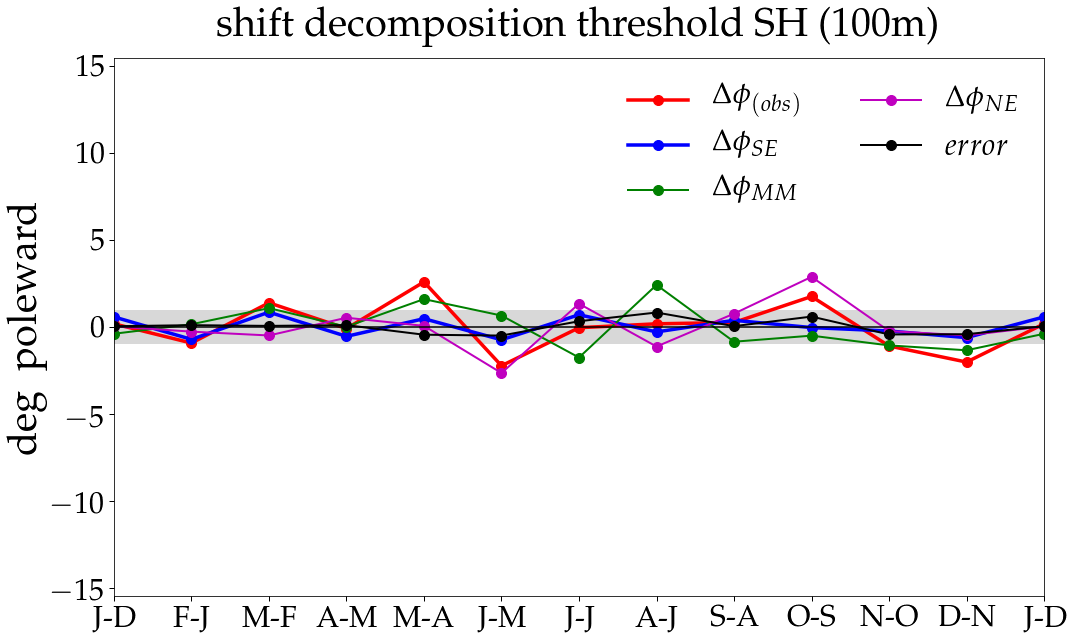

In [47]:
d=3; l=15.5;
plot_monthly_shift_method2(-1,d,l)

         err   shiftEI   shiftMM   shiftSE  shiftTE_obs
0   0.046515 -0.037257  0.386987 -0.583048    -0.186805
1   0.106842  0.264567 -0.158854  0.709122     0.921677
2   0.066371  0.484986 -1.088869 -0.856124    -1.393636
3   0.109068 -0.535700 -0.020540  0.535442     0.088271
4  -0.441362 -0.066910 -1.607221 -0.479925    -2.595418
5  -0.491618  2.644384 -0.660165  0.734638     2.227239
6   0.333818 -1.341948  1.753608 -0.706856     0.038622
7   0.835445  1.121192 -2.422960  0.280306    -0.186017
8   0.050657 -0.769493  0.844163 -0.387091    -0.261764
9   0.601722 -2.886095  0.495371  0.031055    -1.757947
10 -0.427043  0.231773  1.056468  0.228606     1.089804
11 -0.412665  0.483801  1.336451  0.608388     2.015975
12  0.046515 -0.037257  0.386987 -0.583048    -0.186805


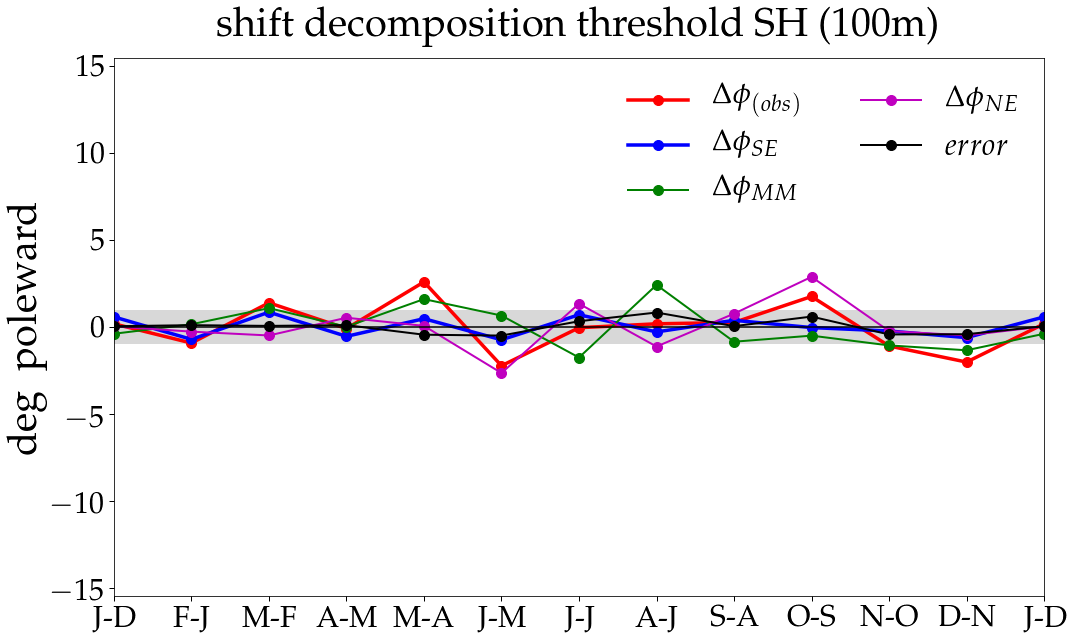

In [45]:
l=15.5
plot_monthly_shift_method2(-1,d,l)

In [46]:
d=2;N=1
zero_div_TE=find_zero(TE_change[d,...],N)
zero_div_SE=find_zero(SE_change[d,...],N)
zero_div_MM=find_zero(MM_change[d,...],N)
zero_div_NE=find_zero(NE_change[d,...],N)

def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y

TE_obs         = add_month_to_end(zero_div_TE[1:]-zero_div_TE[:-1] )
SE             = add_month_to_end(zero_div_SE[1:]-zero_div_TE[:-1])
MM             = add_month_to_end(zero_div_MM[1:]-zero_div_TE[:-1])
NE             = add_month_to_end(zero_div_NE[1:]-zero_div_TE[:-1])
TE_calc        = SE+MM+NE
nonlinear_error= TE_obs-TE_calc

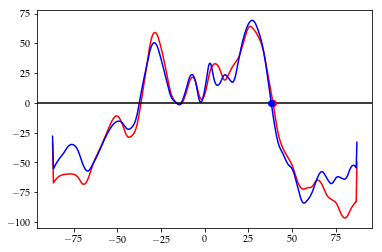

In [47]:
m=0
py.plot(lat,TE_change[d,:,m],'r-')
py.plot(lat,MM_change[d,:,m+1],'b-')
py.axhline(0,color='k')
py.plot(zero_div_TE[m],0,'ro')
py.plot(zero_div_MM[m+1],0,'bo')

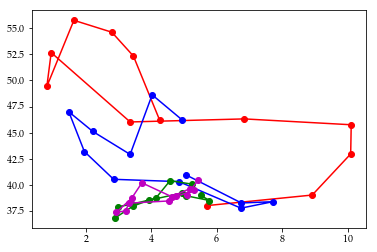

In [48]:
d=0
py.plot(Intensity_teN[d,:],storm_pos_N[d,:],'ro-')
d=1
py.plot(Intensity_teN[d,:],storm_pos_N[d,:],'bo-')
d=2
py.plot(Intensity_teN[d,:],storm_pos_N[d,:],'go-')
d=3
py.plot(Intensity_teN[d,:],storm_pos_N[d,:],'mo-')

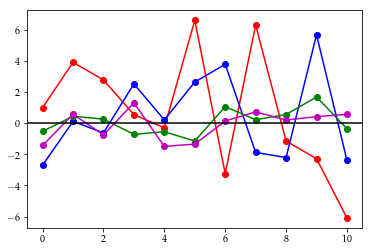

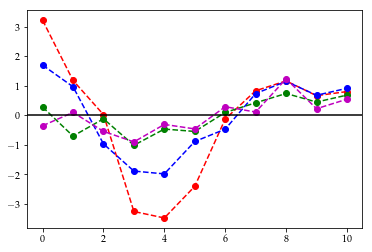

In [49]:
m = lambda x: x[1:]-x[:-1]

py.figure(1)
d=0
py.plot(m(storm_pos_N[d,:]),'ro-')
d=1
py.plot(m(storm_pos_N[d,:]),'bo-')
d=2
py.plot(m(storm_pos_N[d,:]),'go-')
d=3
py.plot(m(storm_pos_N[d,:]),'mo-')
py.axhline(0,color='k')

py.figure(2)
d=0
py.plot(m(Intensity_teN[d,:]),'ro--')
d=1
py.plot(m(Intensity_teN[d,:]),'bo--')
d=2
py.plot(m(Intensity_teN[d,:]),'go--')
d=3
py.plot(m(Intensity_teN[d,:]),'mo--')
py.axhline(0,color='k')

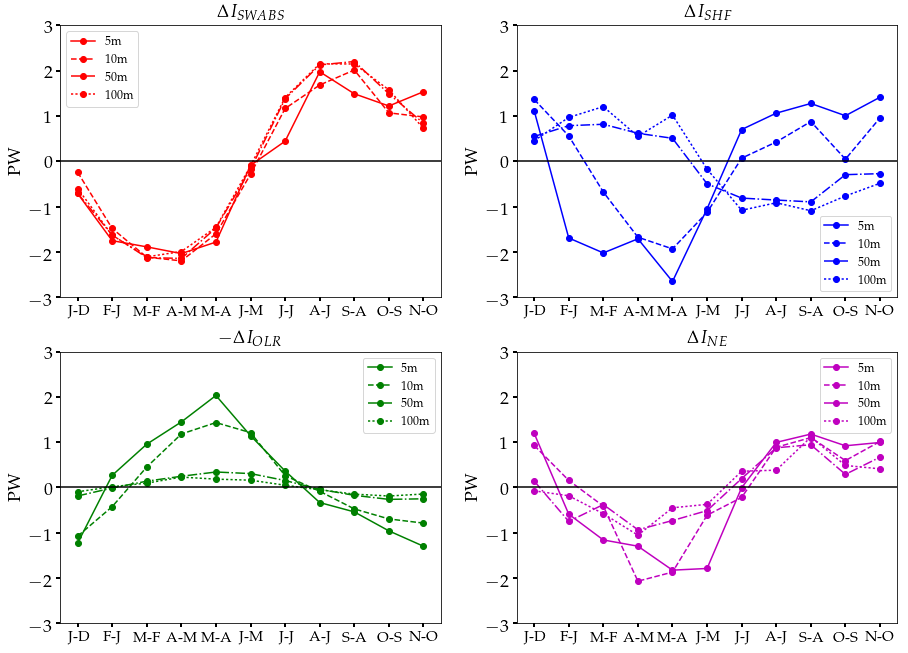

In [50]:
def compare_plot(n,X,c,T,l=3):
    py.subplot(220+n)
    d=0
    def diff(Y):
        return Y[1:]-Y[:-1]
    py.plot(diff(X[d,:]),c+'o-',label='5m')
    py.plot(diff(X[d+1,:]),c+'o--',label='10m')
    py.plot(diff(X[d+2,:]),c+'o-.',label='50m')
    py.plot(diff(X[d+3,:]),c+'o:',label='100m')
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel('PW',fontsize=18)
    py.legend(loc='best',fontsize=12)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title(T,fontsize=18)
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    py.xticks(range(11), mticks,size=15)

fig=py.figure(figsize=(15, 11))
compare_plot(1,I_SWAB_N,'r',r'$\Delta I_{SWABS}$')
compare_plot(2,I_SHF_N,'b',r'$\Delta I_{SHF}$')
compare_plot(3,-I_OLR_N,'g',r'$ - \Delta I_{OLR}$')
compare_plot(4,I_NE_N,'m',r'$\Delta I_{NE}$')

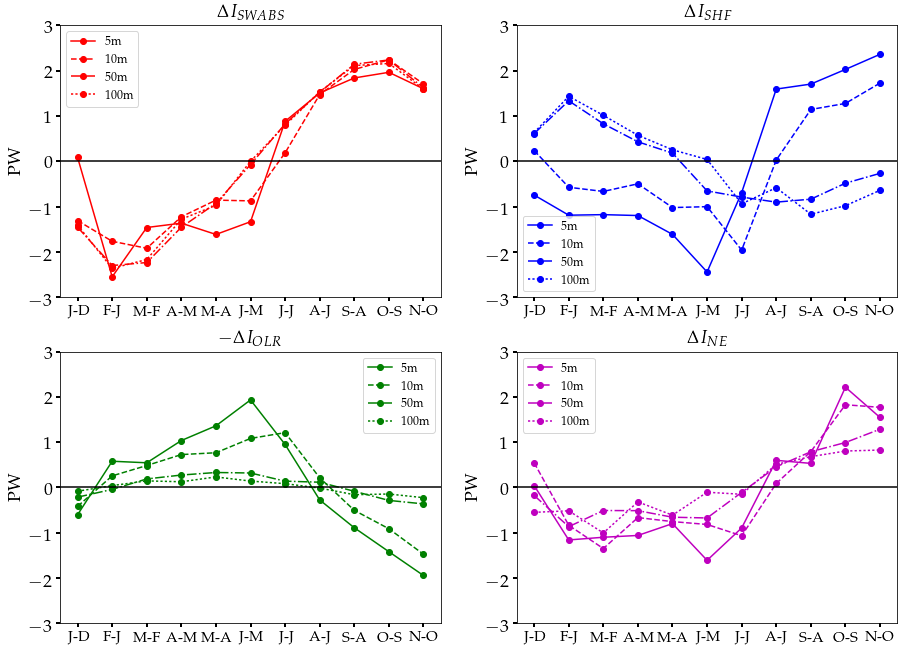

In [51]:
fig=py.figure(figsize=(15, 11))
compare_plot(1,I_SWAB_S,'r',r'$\Delta I_{SWABS}$')
compare_plot(2,I_SHF_S,'b',r'$\Delta I_{SHF}$')
compare_plot(3,-I_OLR_S,'g',r'$ - \Delta I_{OLR}$')
compare_plot(4,I_NE_S,'m',r'$\Delta I_{NE}$')

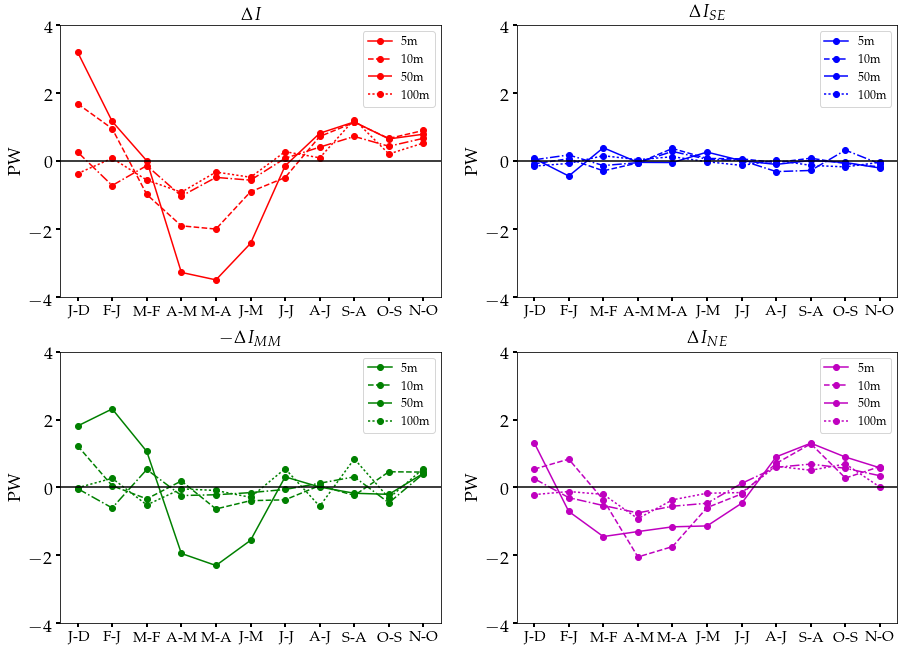

In [52]:
fig=py.figure(figsize=(15, 11))
compare_plot(1,Intensity_teN,'r',r'$\Delta I$',l=4)
compare_plot(2,-Intensity_seN,'b',r'$\Delta I_{SE}$',l=4)
compare_plot(3,-Intensity_mmN,'g',r'$ - \Delta I_{MM}$',l=4)
compare_plot(4,Intensity_neN,'m',r'$\Delta I_{NE}$',l=4)

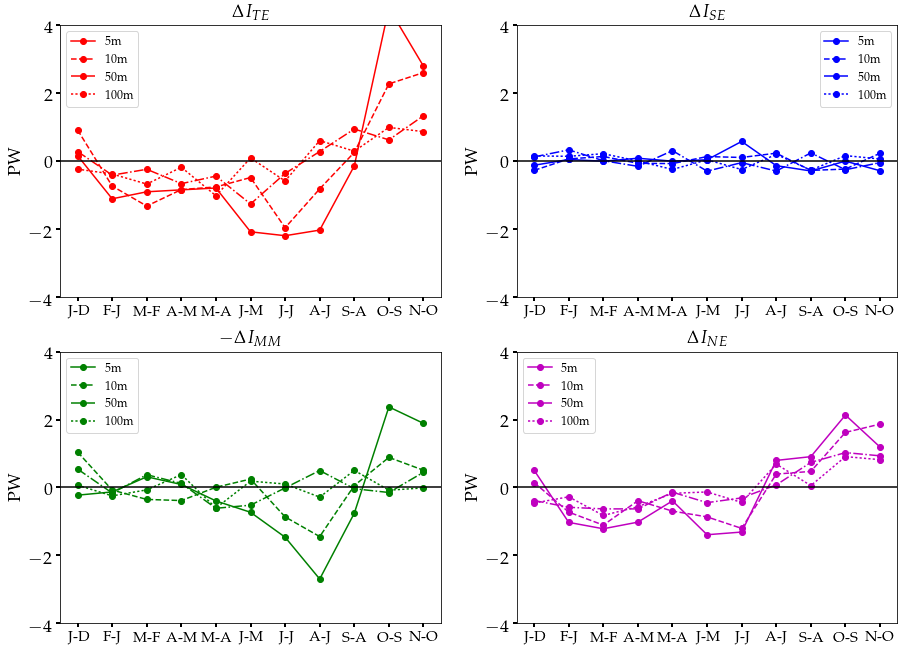

In [53]:
fig=py.figure(figsize=(15, 11))
compare_plot(1,Intensity_teS,'r',r'$\Delta I_{TE}$',l=4)
compare_plot(2,-Intensity_seS,'b',r'$\Delta I_{SE}$',l=4)
compare_plot(3,-Intensity_mmS,'g',r'$ - \Delta I_{MM}$',l=4)
compare_plot(4,Intensity_neS,'m',r'$\Delta I_{NE}$',l=4)

# Try decomposing by calculating the shift from mean values

In [73]:
SE_change=np.zeros((4,len(lat),12))
MM_change=np.zeros((4,len(lat),12))
TE_change=np.zeros((4,len(lat),12))
NE_change=np.zeros((4,len(lat),12))

def calculate_changes_from_mean():
    
    se=np.array(div_SE); te=np.array(div_TE); mm=np.array(div_MM); ne=np.array(div_NE)
    
#     div_se=np.append(se,se[:,:,0,np.newaxis],axis=2)
#     div_mm=np.append(mm,mm[:,:,0,np.newaxis],axis=2)
#     div_te=np.append(te,te[:,:,0,np.newaxis],axis=2)
#     div_ne=np.append(ne,ne[:,:,0,np.newaxis],axis=2)

    for month in range(0,12):

        del_div_SE1=se[:,:,month]-se.mean(axis=-1)
        del_div_MM1=mm[:,:,month]-mm.mean(axis=-1)
        del_div_TE1=te[:,:,month]-te.mean(axis=-1)
        del_div_NE1=ne[:,:,month]-ne.mean(axis=-1)
        
        SE_change[:,:,month]=te.mean(axis=-1)-del_div_SE1
        MM_change[:,:,month]=te.mean(axis=-1)-del_div_MM1
        TE_change[:,:,month]=te.mean(axis=-1)+del_div_TE1
        NE_change[:,:,month]=te.mean(axis=-1)+del_div_NE1

    return SE_change, MM_change, TE_change, NE_change

SE_change, MM_change, TE_change, NE_change = calculate_changes_from_mean()

0


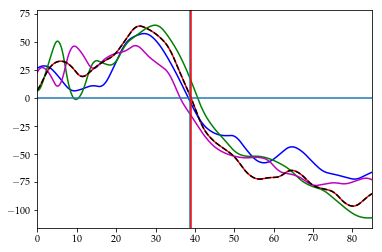

In [74]:
d=2;
m=0;
py.plot(lat,TE_change[d,:,m],'r-')
py.plot(lat,SE_change[d,:,m],'b-')
py.plot(lat,MM_change[d,:,m],'g-')
py.plot(lat,NE_change[d,:,m],'m-')
py.plot(lat,div_TE[d][:,m],'k--')
py.xlim(0,85)
#py.ylim(-125,125)
py.axhline(0)
py.axvline(storm_pos_N[d,:].mean())
py.axvline(storm_pos_N[d,m],color='r')
print m

In [75]:
d=3
print storm_pos_N[d,:].mean()

def find_zero(div,N=1):
        if N==1 :
         l_range=((lat>=35) & (lat<=70))            
        else    :
         l_range=((lat>=-70) & (lat<=-35))                    
        interpolation_function = interp1d(div[l_range],lat[l_range],kind='linear')
        try :
            zero_loc=interpolation_function(0)
        except ValueError as err:
            zero_loc=np.nan
        
        return zero_loc

print find_zero(TE_change[d,...].mean(axis=-1),N=1)

38.9172817781
38.8263643552


In [217]:
from scipy.interpolate import interp1d

def find_zero(div,N=1,mean='no'):   
  if N==1 :
     l_range=((lat>=35) & (lat<=70))            
  if N==-1:
    l_range=((lat>=-70) & (lat<=-32))  
    
  if mean == 'no' :
      zero_loc = np.zeros(12)
      for m in range(0,12): 
            if N==1 :
                interpolation_function = interp1d(div[l_range,m],lat[l_range],kind='linear')
            if N==-1 :
                interpolation_function = interp1d(div[l_range,m][::-1],lat[l_range][::-1],kind='linear')
            try :
                zero_loc[m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[m]=np.nan
  if mean == 'yes' :
                   
        interpolation_function = interp1d(div[l_range],lat[l_range],kind='linear')
        try :
            zero_loc=interpolation_function(0)
        except ValueError as err:
            zero_loc=np.nan
            
  return zero_loc

def plot_shift_from_mean_method2(N,d,l) :
        
    if d==0: depth=5
    if d==1: depth=10
    if d==2: depth=50
    if d==3: depth=100
     
    zero_div_TE=find_zero(TE_change[d,...],N)
    zero_div_SE=find_zero(SE_change[d,...],N)
    zero_div_MM=find_zero(MM_change[d,...],N)
    zero_div_NE=find_zero(NE_change[d,...],N)
    
    mean_pos_TE=find_zero(TE_change[d,...].mean(axis=-1),N,mean='yes')
    
    print mean_pos_TE
    
    if N==1 :
        I=Intensity_teN
    if N==-1 :
        I=Intensity_teS
        
    def threshold(I, pos1, pos2, pos3, pos4):
        I=np.append(I[-1],I)
        for m in range(13):
            if (np.abs(I[m])<+1) :
                #N[d,m]=np.nan
                pos1[m]=np.nan
                pos2[m]=np.nan
                pos3[m]=np.nan
                pos4[m]=np.nan                
        return pos1, pos2, pos3, pos4

    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I[d,:], zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE )
                
    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))

    def add_month_to_end(y1) :
        y=np.append(y1,y1[0])
        return y

    TE_obs         = add_month_to_end(zero_div_TE-mean_pos_TE)
    SE             = add_month_to_end(zero_div_SE-mean_pos_TE)
    MM             = add_month_to_end(zero_div_MM-mean_pos_TE)
    NE             = add_month_to_end(zero_div_NE-mean_pos_TE)
    TE_calc        = SE+MM+NE
    nonlinear_error= TE_obs-TE_calc
    
    #print TE_obs.shape

    from pandas import DataFrame
    df= DataFrame({ "shiftTE_obs": TE_obs, "shiftSE": SE , "shiftMM": MM, "shiftEI": NE, "err": nonlinear_error})
    print df

    fig=py.plot(N*TE_obs,'r.-',label=r'$\Delta\phi_{ ({obs})}$',linewidth=3.5,markersize=20)
    fig=py.plot(N*SE,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(N*MM,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(N*NE,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    #py.legend(fontsize=28,loc='best',ncol=2)
    py.axhline(0, color='k',linewidth=1.5)
    #mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    #py.ylabel(r"\textrm{Poleward\hspace{ 2mm} Shift \hspace{ 2mm}}$(^{o}\:N)$", fontsize=45)
    py.ylabel("deg \\ poleward", fontsize=40)
    if N==1:
        H="NH"
    else :
        H="SH"        
    title="shift decomposition about mean"+" "+H+" ("+str(depth)+"m)"
    title1="shift_decomp_about_mean"+H+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
    py.show()

-44.5256376792
         err   shiftEI   shiftMM   shiftSE  shiftTE_obs
0        NaN -3.452497       NaN  1.136978    -8.749689
1        NaN -3.640647       NaN  0.927828     1.157127
2        NaN       NaN       NaN       NaN          NaN
3  -1.832071 -0.057372 -4.070096 -3.985827    -9.945366
4   2.409138  0.481016 -7.470782 -1.367399    -5.948029
5  -1.186285  0.738228  1.663783 -0.725817     0.489910
6  -1.464044  1.216265  6.804126  0.487881     7.044227
7  -7.614022  8.723377  3.090889  0.169044     4.369288
8  -7.801717  9.808996  0.124825 -0.765860     1.366245
9  -1.994965  1.912304 -2.246027  0.800777    -1.527911
10  0.912479 -3.017659 -1.902979  0.468276    -3.539883
11       NaN -4.570432       NaN  0.326223    -5.567618
12       NaN -3.452497       NaN  1.136978    -8.749689


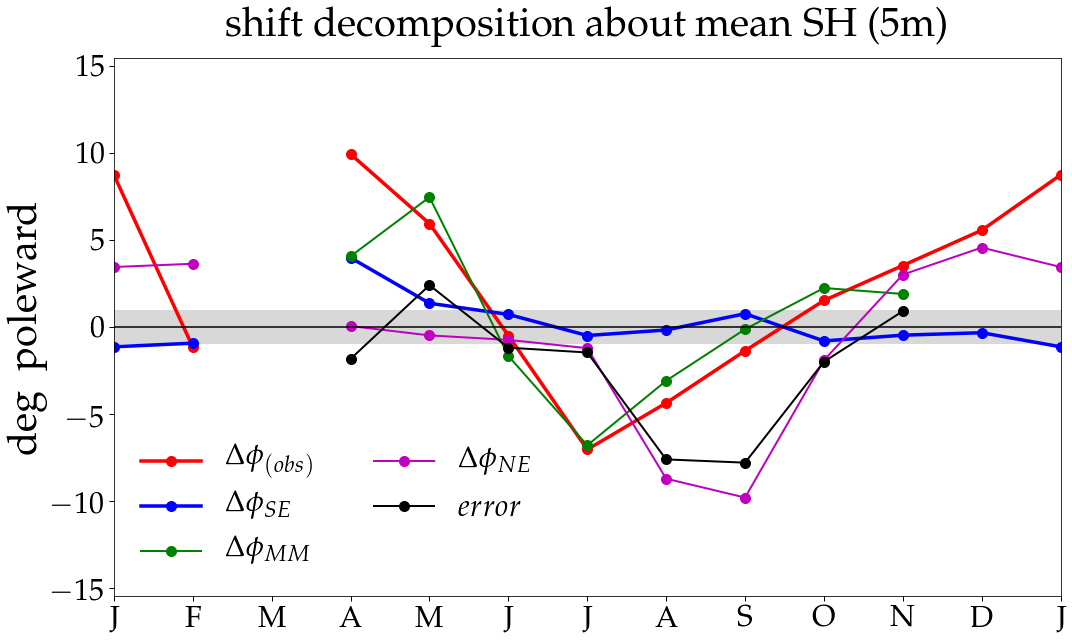

In [77]:
d=0; l=15.5;
N=-1
plot_shift_from_mean_method2(N,d,l)

44.5832368526
         err   shiftEI   shiftMM   shiftSE  shiftTE_obs
0   1.558900 -2.272193 -5.783528 -0.055425    -6.552246
1   2.464824 -3.770034 -4.283003  0.043463    -5.544750
2   6.538168 -8.035512 -0.512430  0.391889    -1.617886
3   1.871061 -1.934853  1.623842 -0.388107     1.171943
4  -1.501824  3.588657  0.378130 -0.733036     1.731928
5        NaN  2.575667       NaN -1.068751     1.440485
6        NaN  2.990124       NaN -0.746014     8.068464
7        NaN       NaN       NaN       NaN          NaN
8        NaN       NaN       NaN       NaN          NaN
9   3.059806  0.471195  6.802098 -0.315798    10.017301
10 -3.224778 -0.570578  9.582733  1.952062     7.739439
11 -3.936854 -1.594716  5.935530  1.244229     1.648189
12  1.558900 -2.272193 -5.783528 -0.055425    -6.552246


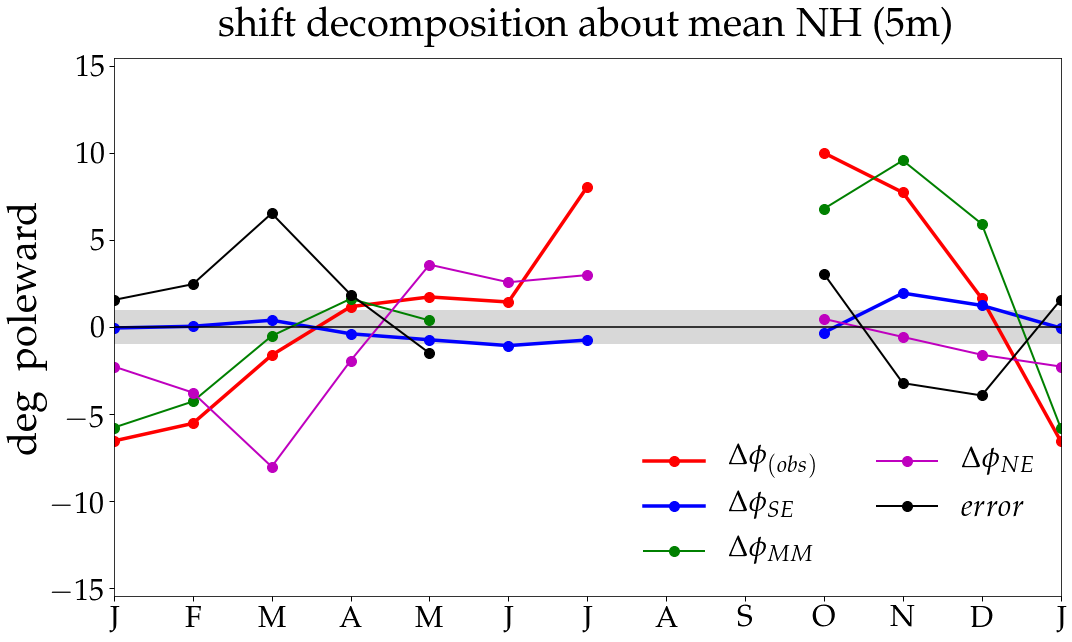

In [78]:
d=0; l=15.5;
N=1
plot_shift_from_mean_method2(N,d,l)

-44.5256376792
         err   shiftEI   shiftMM   shiftSE  shiftTE_obs
0        NaN -3.452497       NaN  1.136978    -8.749689
1        NaN -3.640647       NaN  0.927828     1.157127
2        NaN       NaN       NaN       NaN          NaN
3  -1.832071 -0.057372 -4.070096 -3.985827    -9.945366
4   2.409138  0.481016 -7.470782 -1.367399    -5.948029
5  -1.186285  0.738228  1.663783 -0.725817     0.489910
6  -1.464044  1.216265  6.804126  0.487881     7.044227
7  -7.614022  8.723377  3.090889  0.169044     4.369288
8  -7.801717  9.808996  0.124825 -0.765860     1.366245
9  -1.994965  1.912304 -2.246027  0.800777    -1.527911
10  0.912479 -3.017659 -1.902979  0.468276    -3.539883
11       NaN -4.570432       NaN  0.326223    -5.567618
12       NaN -3.452497       NaN  1.136978    -8.749689


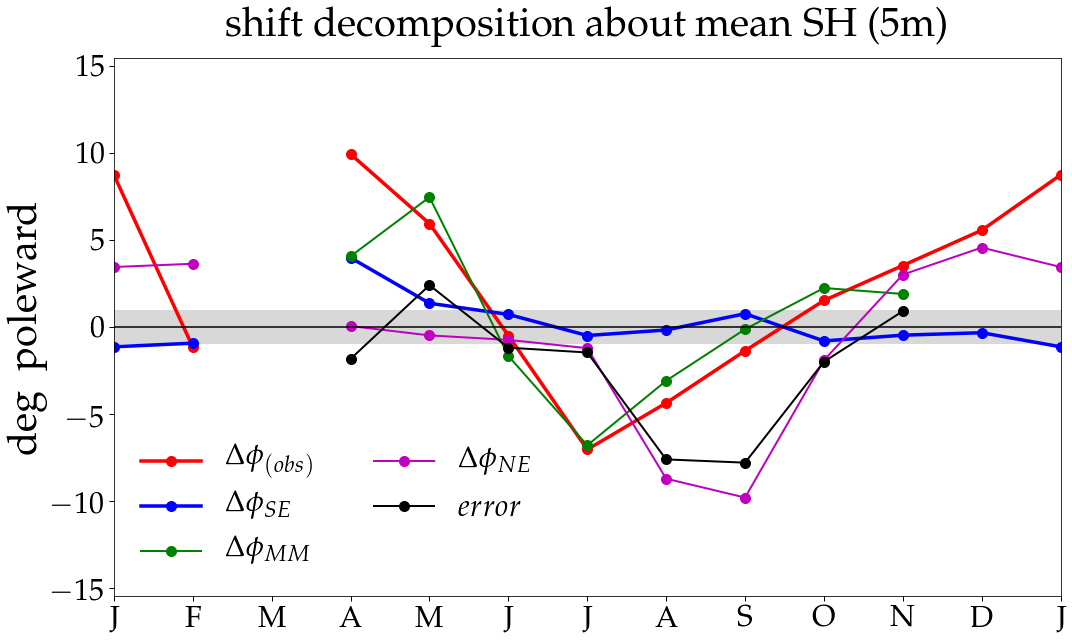

In [69]:
d=0; l=15.5;
N=-1
plot_shift_from_mean_method2(N,d,l)

# Average Northern and Southern Hemispheres

In [37]:
TE=np.array(TE); SE=np.array(SE); MM=np.array(MM); NE=np.array(INE)
#div_TE=np.array(div_TE); div_SE=np.array(div_SE); div_MM=np.array(div_MM); div_NE=np.array(div_NE)
Iswabs=np.array(Iswabs); Ishf=np.array(Ishf); Ine=np.array(Ine); Iolr=np.array(Iolr); Idhdt=np.array(Idhdt); 

In [38]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,:]+flux_flag*np.roll(x[:,l_S,:][:,::-1,:], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[:,:,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [39]:
TE_a   ,SE_a     , MM_a   , NE_a     ,ignore,  lat_a = N_S_avg(TE, SE, MM, NE,NE, lat)
#div_TE_a,div_SE_a, div_MM_a, div_NE_a, ignore, lat_a = N_S_avg(div_TE, div_SE, div_MM, div_NE, div_NE, lat, flux_flag=1 )
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )

In [40]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div(x):
       N=1
       fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(4):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div


div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a

In [41]:
#lat=div[0]['latn']

from scipy.interpolate import interp1d

def find_zero(div):
  zero_loc = np.zeros((4,13))
  for d in range(0,4):
      for m in range(0,13):
            l_range=((lat_a>=30) & (lat_a<=60))            
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

storm_pos=find_zero(div_TE_a)

In [42]:
div_TE_a.shape

(4, 871, 13)

In [43]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((4,13))
  for d in range(0,4):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=storm_pos
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X[d,m])
        except ValueError as err:
            D[d,m]==np.nan        
  return D

Intensity_te=inerp_at_max(TE_a,lat_a)
Intensity_se=inerp_at_max(SE_a,lat_a)
Intensity_mm=inerp_at_max(MM_a,lat_a)
Intensity_ne=inerp_at_max(NE_a,lat_a)


I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

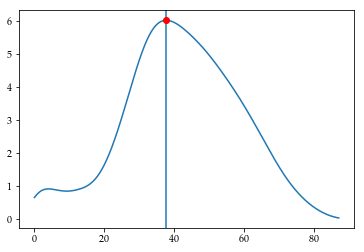

In [44]:
m=12; d=0
py.plot(lat_a,TE_a[d,:,m])
py.axvline(storm_pos[d,m])
py.plot(storm_pos[d,m], Intensity_te[d,m],'ro')

## Shift decompose

In [45]:
def calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=1):
    
    se=np.array(div_SE_a); te=np.array(div_TE_a); mm=np.array(div_MM_a); ne=np.array(div_NE_a)
    
    def diff(x):
        return x[:,:,1:]-x[:,:,:-1] 
    base_pos=te[...,:-1]
    
    if month_to_month==0 :
      def diff(x):
         return x[:,:,1:]-x[...,1:,None].mean(axis=2)    
      base_pos=te[...,1:,None].mean(axis=2)
        
    TE_change=base_pos+diff(te)
    NE_change=base_pos+diff(ne)
    SE_change=base_pos-diff(se)
    MM_change=base_pos-diff(mm)
    
    a = lambda x: np.append(x[:,:,-1,None],x,axis=-1)
    
    return a(SE_change), a(MM_change), a(TE_change), a(NE_change)

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=1)

In [46]:
div_NE_a.shape

(4, 871, 13)

In [47]:
def find_zero(div,lower_limit=30,specific_month=-1):
  depths=div.shape[0];
  months=div.shape[-1];
  zero_loc = np.zeros((depths,months))
  for d in range(0,depths):
      for m in range(0,months):
            l_range=((lat_a>=30) & (lat_a<=60))   
            if m==specific_month:
                l_range=((lat_a>=lower_limit) & (lat_a<=60))
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

In [48]:
def threshold(I,value, pos1, pos2, pos3, pos4):
      for d in range(4):  
        for m in range(13):
            if (np.abs(I[d,m])<value) :
                #N[d,m]=np.nan
                pos1[d,m]=np.nan
                pos2[d,m]=np.nan
                pos3[d,m]=np.nan
                pos4[d,m]=np.nan                
      return pos1, pos2, pos3, pos4
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, 1.0, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))

In [49]:
def plot_flux(d,threshold_value) :
    
    n=d+1
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    pos=zero_div_TE
    
    if d==0:depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100

    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def add(y):
       y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
       return y1    
    
    def a(y):
       y1 = y#np.append(y,y[0])
       return y1 
    
    v = np.arange(-12.0, 13.0, threshold_value)
    latns=lat

    py.subplot(220+n)
    b = py.contourf(range(13),lat_a,add(TE_a[d,...]), v, cmap=BuRd); 
    # py.colorbar()
    c=py.contour(range(13),lat_a, add(TE_a[d,...]), v, colors='k',linewidths=1.0);
    
    py.plot(range(13), (pos[d,:]), 'ro-')
    #py.plot(range(13), (Intensity_te[d,:]*5), 'bo-')
    
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
    
    py.xticks(range(13), (mticks),fontsize=15)
    py.yticks(range(-0,81,20),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title(str(depth)+' m',fontsize=30)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
    py.ylim(0,60)
#     py.savefig(fig_dest+title+'_flux.pdf')
    #print fig_dest+title+'_flux.pdf'
    #py.show()

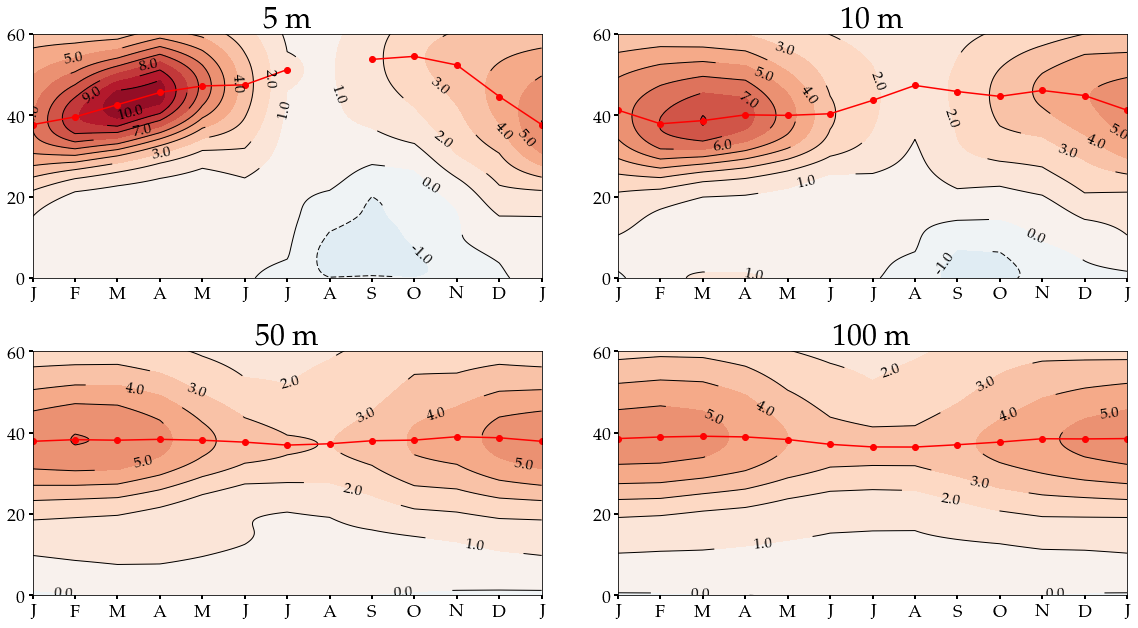

In [54]:
fig=py.figure(figsize=(20, 10))
for d in range(4):
    plot_flux(d,1.0)

In [55]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def plot_monthly_shift(d,l,month_to_month=1,threshold_value=+1) :
        
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
            
    I=Intensity_te
    
    n=d+1    
#     month_to_month=1
#     threshold_value=0
    SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
    if d==0:
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
    else :
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    
    if ((d==0) & (month_to_month==0)):
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))
    
    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))
    
    
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    base_pos=zero_div_TE[d,:-1]
    def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y
        
    if month_to_month==0:
        s=TE_change[d,:,1:].mean(axis=-1)[None,:,None]
        base_pos=find_zero(s)
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        #base_pos=44 #np.nanmean(zero_div_TE[d,:-1])
        print base_pos
        
    TE_obs_pos         = add_month_to_end(zero_div_TE[d,1:]-base_pos)
    SE_pos             = add_month_to_end(zero_div_SE[d,1:]-base_pos)
    MM_pos             = add_month_to_end(zero_div_MM[d,1:]-base_pos)
    NE_pos             = add_month_to_end(zero_div_NE[d,1:]-base_pos)
    TE_calc_pos        = SE_pos+MM_pos+NE_pos
    nonlinear_error= TE_obs_pos-TE_calc_pos
        
#     py.subplot(220+n)
    
    fig=py.plot(TE_obs_pos,'r.-',label=r'$\Delta\phi_{ ({obs})}$',linewidth=3.5,markersize=20)
    fig=py.plot(SE_pos,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(MM_pos,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(NE_pos,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)

    title="shift decomposition threshold"+" "+" ("+str(depth)+"m)"
    title1="shift_decomp_threshold"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
    py.show()

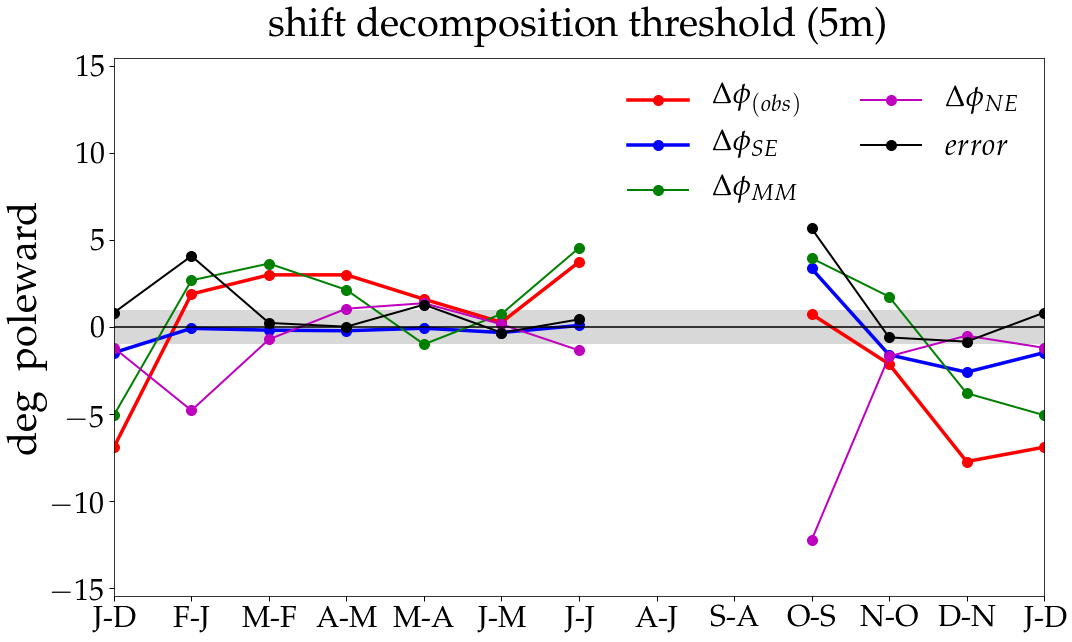

In [56]:
l=15.5
month_to_month=1; threshold_value=+1.0
plot_monthly_shift(0,l,month_to_month,threshold_value)

[[ 44.31003483]]


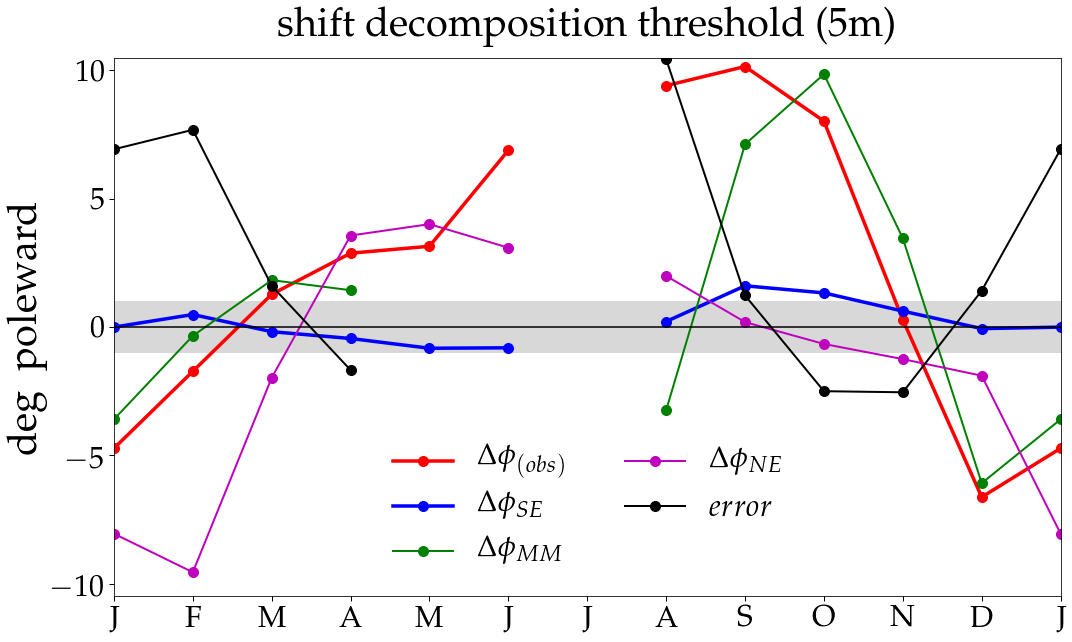

In [58]:
plot_monthly_shift(0,10.5,month_to_month=0,threshold_value=1)

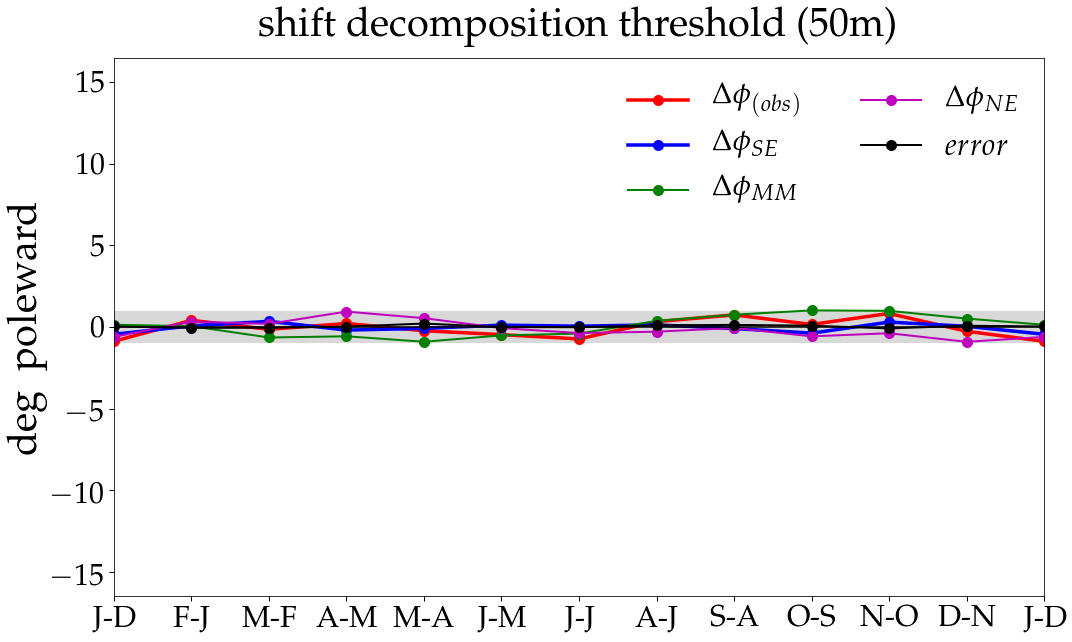

In [59]:
plot_monthly_shift(2,16.5,month_to_month=1,threshold_value=+1)

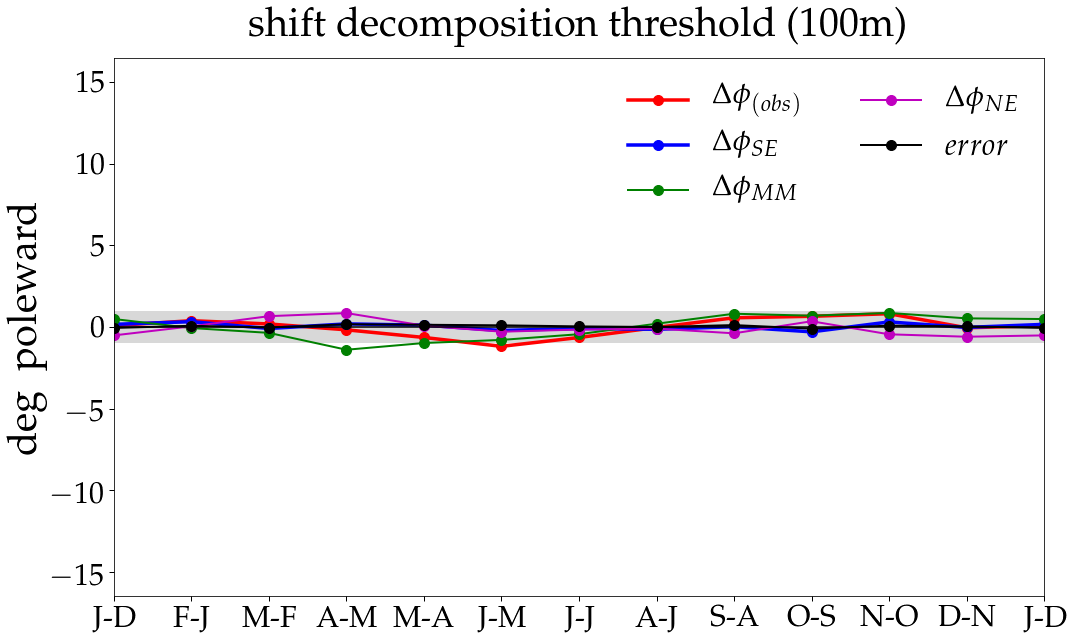

In [60]:
plot_monthly_shift(3,16.5,month_to_month=1,threshold_value=+1)

[[ 37.88405995]]


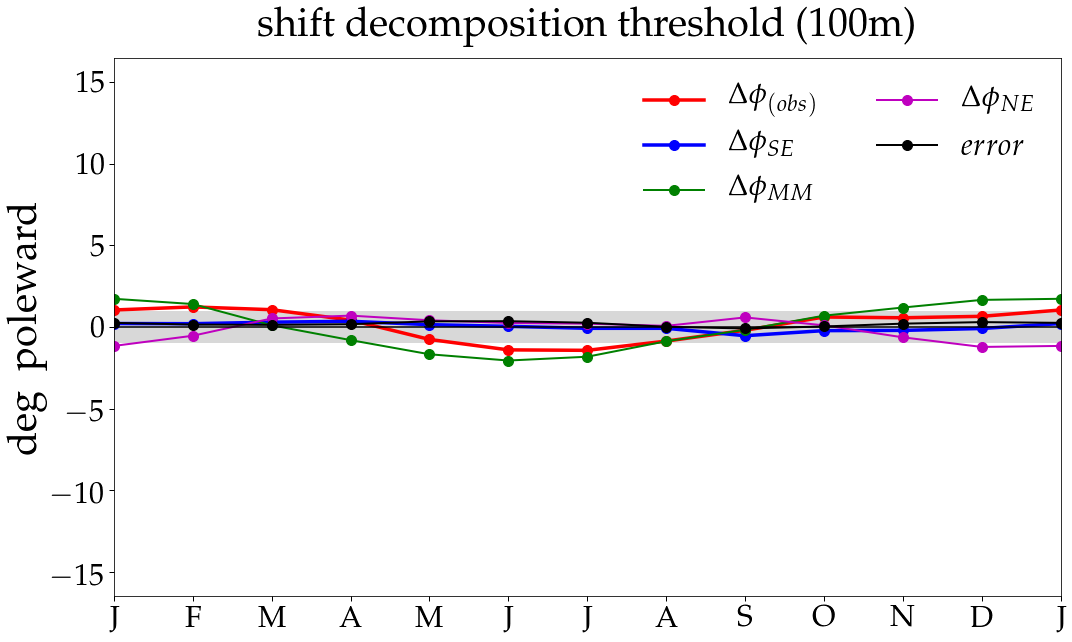

In [61]:
plot_monthly_shift(3,16.5,month_to_month=0,threshold_value=1)

[[ 44.31003483]]


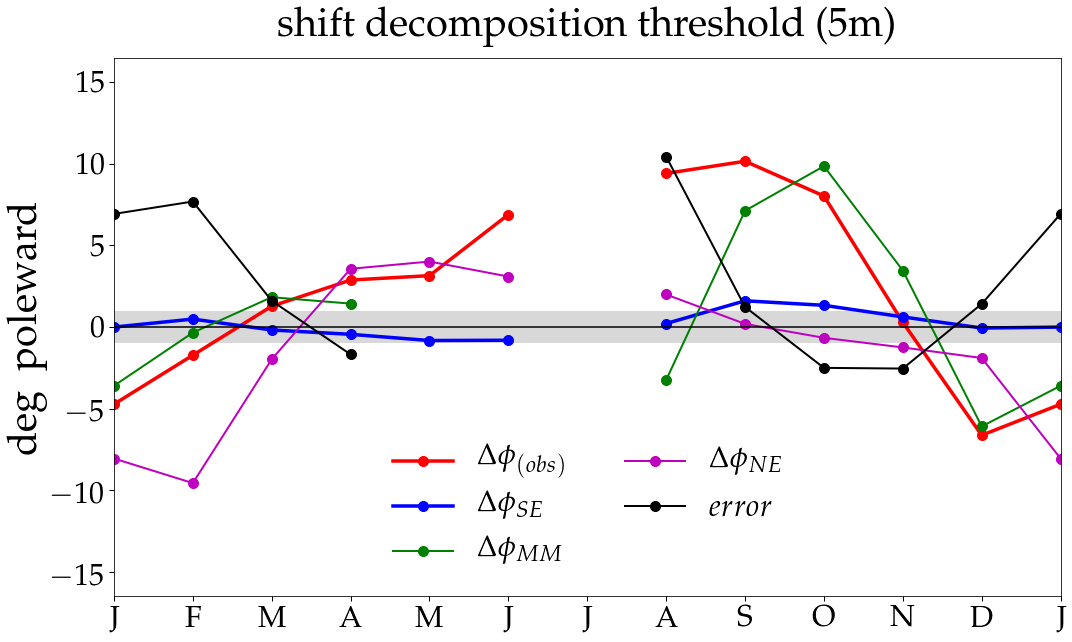

In [62]:
plot_monthly_shift(0,16.5,month_to_month=0,threshold_value=1)

# Intensity decomposition

In [63]:
### radiation

def plot_intensity(d,l,month_to_month=1):
    
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
        if month_to_month==1 :
            y1=y#np.append(y,y[:,0,np.newaxis],axis=1)
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    
    fig=py.figure(figsize=(15, 9))           
    py.plot(D(Intensity_te,d),'ro-',label=r'$\Delta I$',lw=2.5)
    py.plot(D(Intensity_ne,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)   
    py.plot(-D(Intensity_se,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=2.5)
    py.plot(-D(Intensity_mm,d),'go-',label=r'$ - \Delta I_{MM}$',lw=2.5)
                                              
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title="Intensity decomposition"+" "+" ("+str(depth)+"m)"
    title1="Intensity_decomposition_"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-0.5, 0.5, facecolor='0.5', alpha=0.3)
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    #py.savefig(fig_dest+title1+'.pdf')
    print fig_dest+title1+'.pdf'

    
    py.tight_layout()

/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/Intensity_decomposition__100m.pdf


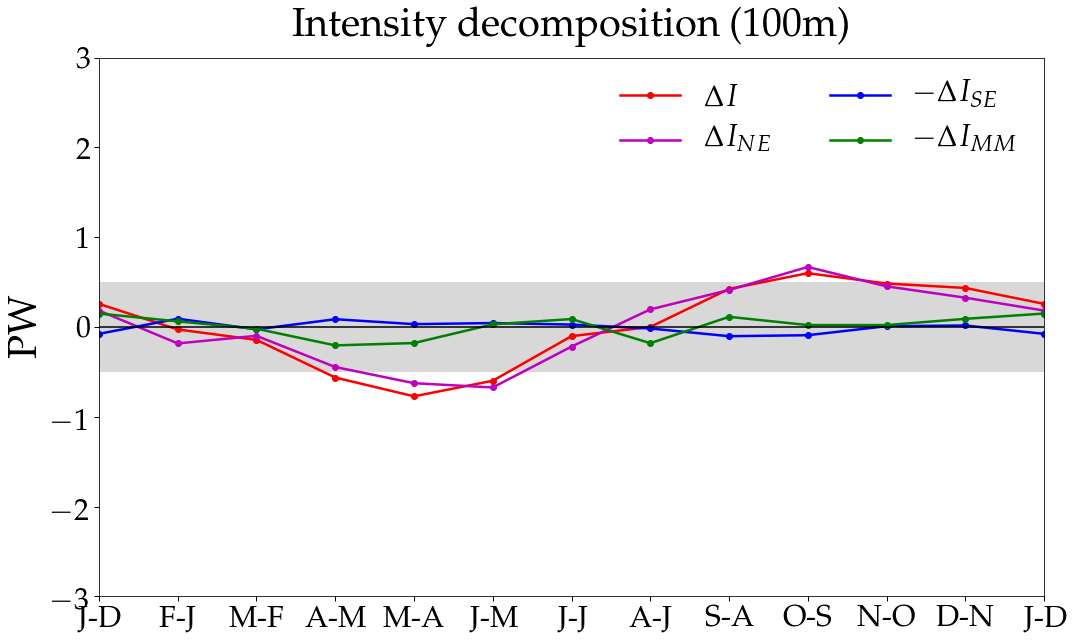

In [64]:
plot_intensity(3,3,1)

In [65]:
### radiation

def D(y,d):
    y1=np.append(y,y[:,0,np.newaxis],axis=1)
    x1=y1[d,1:]-y1[d,:-1]
    x2=np.append(x1[-1],x1)
    return x2

def plot_delta_NE(d,l,month_to_month=1):
    
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    

    def D(y,d):
        if month_to_month==1 :
            y1=y
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            #mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            #mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
            
    fig=py.figure(figsize=(15, 9))           
    py.plot(D(I_NE,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)
    py.plot(D(I_SWAB,d),'ro-',label=r'$\Delta I_{SWABS}$',lw=2.5)
    py.plot(D(I_SHF,d),'bo-',label=r'$\Delta I_{SHF}$',lw=2.5)
    py.plot(D(-I_OLR,d),'go-',label=r'$ - \Delta I_{OLR}$',lw=2.5) 
        #py.plot(D(-I_dhdt_N,d),'ko-',label=r'$ - \Delta I_{\frac{dh}{dt}}$',lw=2.5) 
        #py.plot(D(-I_dhdt_S,d),'ko-',label=r'$ - \Delta I_{\frac{dh}{dt}}$',lw=2.5) 
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title="NE decomposition"+" "+" ("+str(depth)+"m)"
    title1="NE_decomposition_"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-0.3, 0.3, facecolor='0.5', alpha=0.3)
    py.legend(fontsize=25,ncol=2,frameon=False, loc='best')
    
    #py.savefig(fig_dest+title1+'.pdf')
    print fig_dest+title1+'.pdf'    
    py.tight_layout()

In [66]:
I_NE.shape

(4, 13)

/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/NE_decomposition__100m.pdf


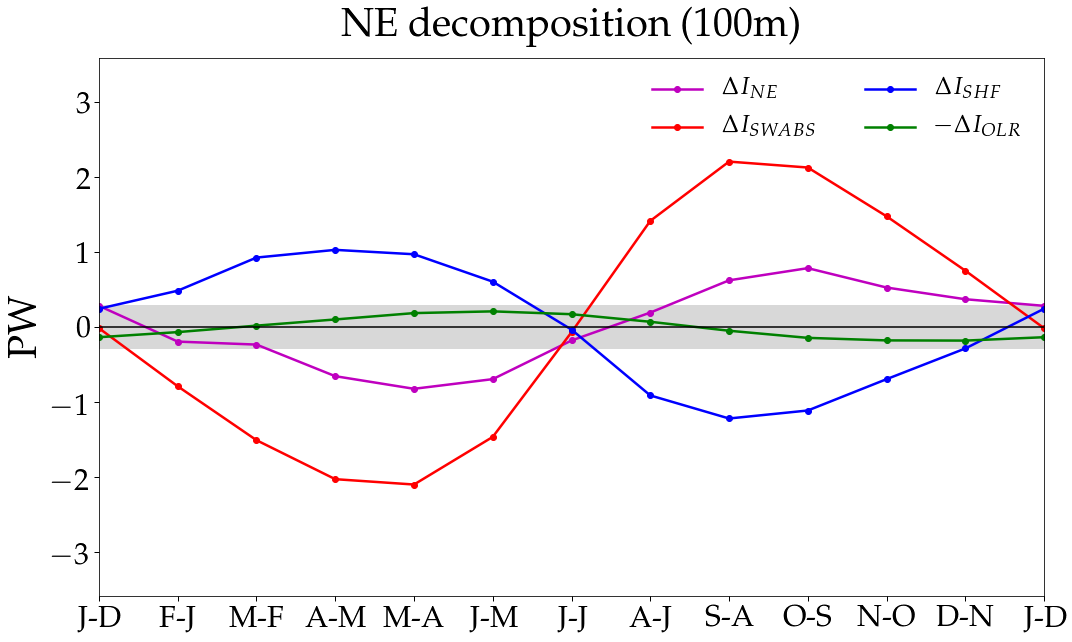

In [67]:
plot_delta_NE(3,3.6,1)

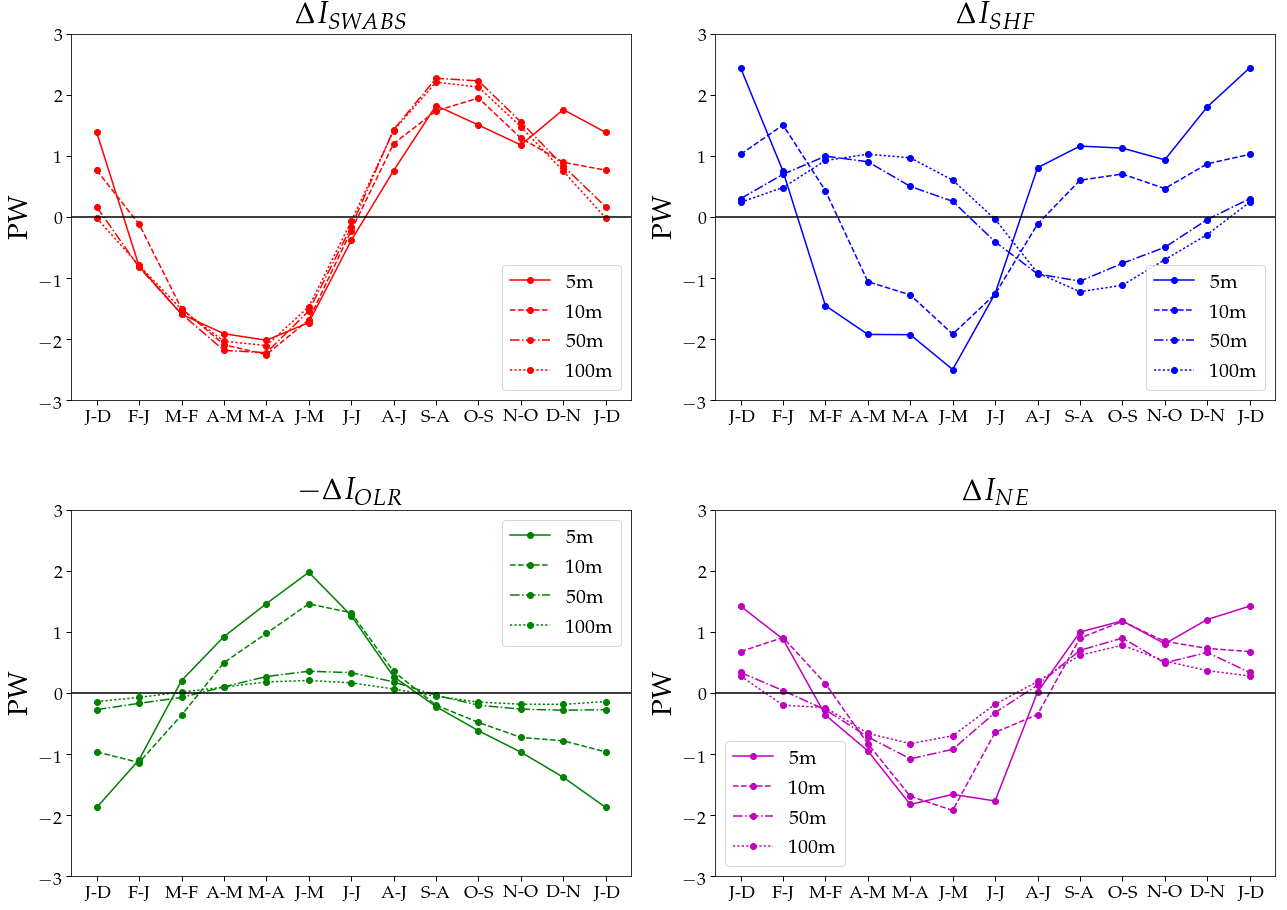

In [68]:
def compare_plot(n,X,c,T,month_to_month=1,l=3):
    py.subplot(220+n)
    d=0
    
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    def D(y):
        if month_to_month==1 :
            x1=y[1:]-y[:-1]
            x2=np.append(x1[-1],x1)
        else :
            y1=y[:]-y[:-1,None].mean(axis=0)
            x2=y1
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    
    py.plot(range(13),D(X[d,:]),c+'o-',label='5m')
    py.plot(range(13),D(X[d+1,:]),c+'o--',label='10m')
    py.plot(range(13),D(X[d+2,:]),c+'o-.',label='50m')
    py.plot(range(13),D(X[d+3,:]),c+'o:',label='100m')
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel('PW',fontsize=28)
    py.legend(loc='best',fontsize=20)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title(T,fontsize=30)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=18,size=5,width=1)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)


fig=py.figure(figsize=(22, 15))
compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$')
compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$')
compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$')
compare_plot(4,I_NE,'m',r'$\Delta I_{NE}$')


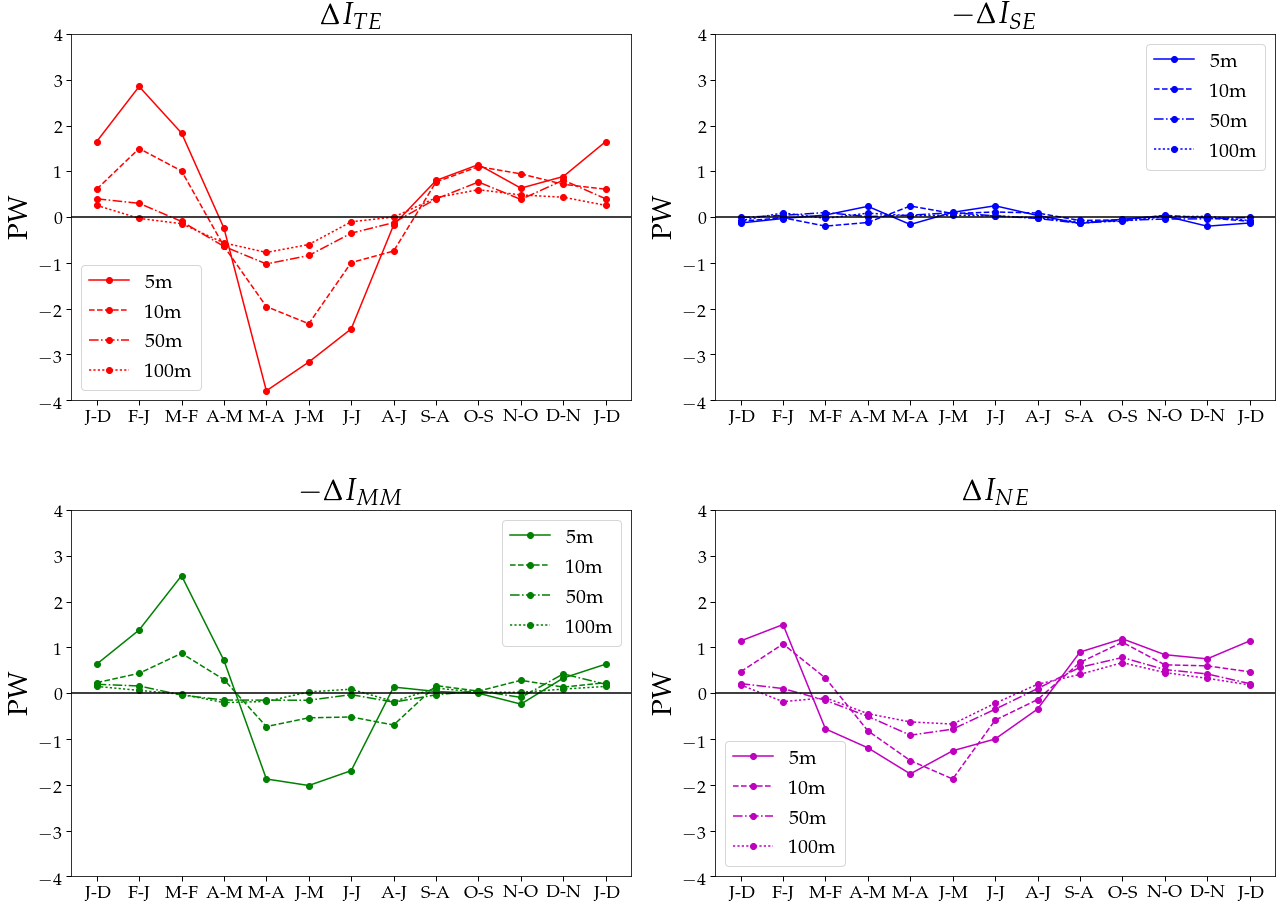

In [69]:
fig=py.figure(figsize=(22, 15))
compare_plot(1,Intensity_te,'r',r'$\Delta I_{TE}$',l=4)
compare_plot(2,-Intensity_se,'b',r'$ - \Delta I_{SE}$',l=4)
compare_plot(3,-Intensity_mm,'g',r'$ - \Delta I_{MM}$',l=4)
compare_plot(4,Intensity_ne,'m',r'$\Delta I_{NE}$',l=4)

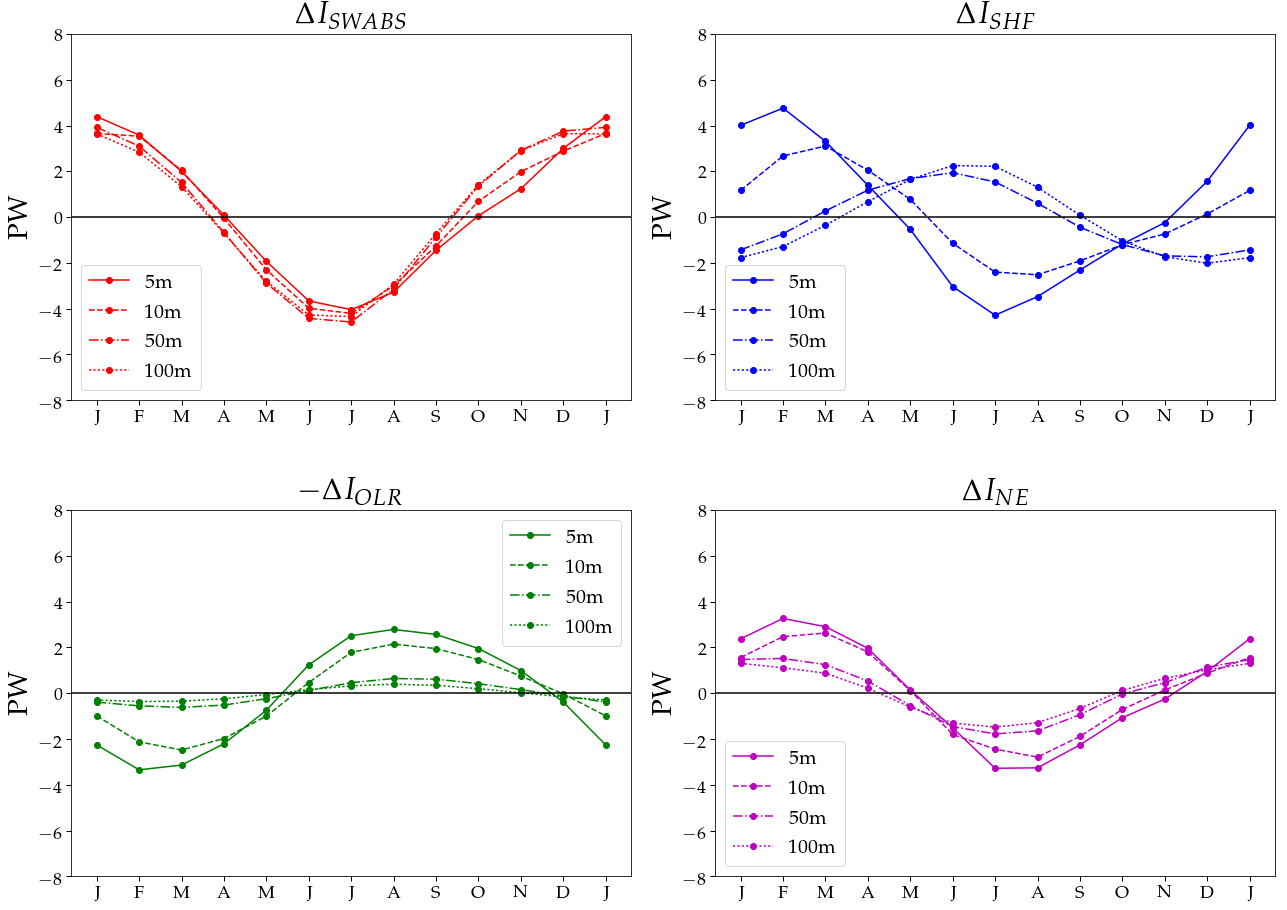

In [70]:
m_to_m=0; l=8
fig=py.figure(figsize=(22, 15))
compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$',m_to_m,l)
compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$',m_to_m,l)
compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$',m_to_m,l)
compare_plot(4,I_NE,'m',r'$\Delta I_{NE}$',m_to_m,l)

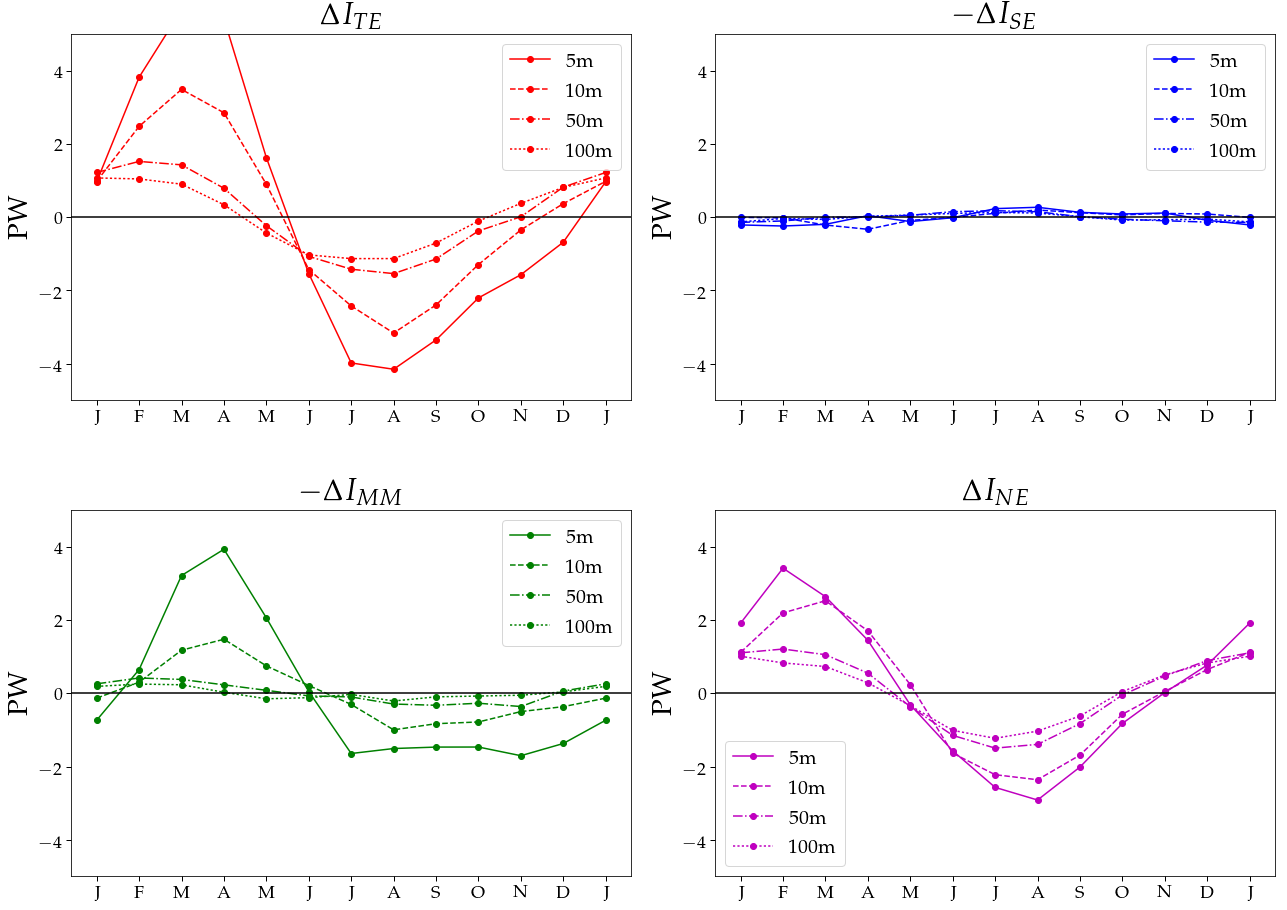

In [71]:
m_to_m=0; l=5
fig=py.figure(figsize=(22, 15))
compare_plot(1,Intensity_te,'r',r'$\Delta I_{TE}$',m_to_m,l)
compare_plot(2,-Intensity_se,'b',r'$ - \Delta I_{SE}$',m_to_m,l)
compare_plot(3,-Intensity_mm,'g',r'$ - \Delta I_{MM}$',m_to_m,l)
compare_plot(4,Intensity_ne,'m',r'$\Delta I_{NE}$',m_to_m,l)

In [72]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((4,13))
  for d in range(0,4):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=40
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X)
        except ValueError as err:
            D[d,m]==np.nan        
  return D


I_SWAB_at40 =inerp_at_max(Iswabs_a,latr_a)
I_SHF_at40  =inerp_at_max(Ishf_a,latr_a)
I_NE_at40   =inerp_at_max(Ine_a,latr_a)
I_OLR_at40  =inerp_at_max(Iolr_a,latr_a)
I_dhdt_at40 =inerp_at_max(Idhdt_a,latr_a)

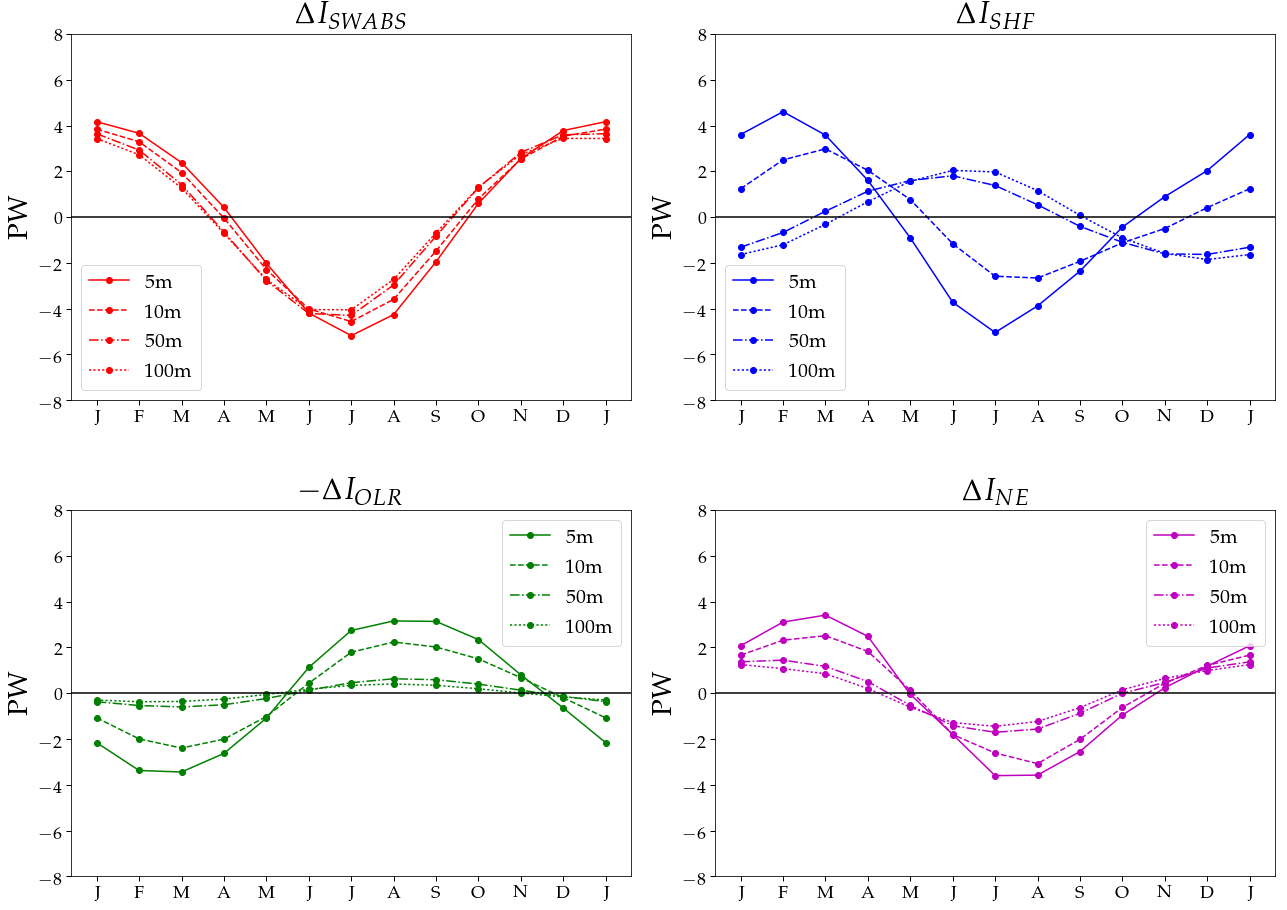

In [73]:
m_to_m=0; l=8
fig=py.figure(figsize=(22, 15))
compare_plot(1,I_SWAB_at40,'r',r'$\Delta I_{SWABS}$',m_to_m,l)
compare_plot(2,I_SHF_at40,'b',r'$\Delta I_{SHF}$',m_to_m,l)
compare_plot(3,-I_OLR_at40,'g',r'$ - \Delta I_{OLR}$',m_to_m,l)
compare_plot(4,I_NE_at40,'m',r'$\Delta I_{NE}$',m_to_m,l)

# Decompose SHF to understand what dominates the phase change

In [80]:
# cant open because the individual fluxes are not stored

In [81]:
flux[3].keys()

['latn',
 'TE',
 'TOA_d',
 'MM',
 'latnr',
 'dhdt',
 'olr',
 'SHF',
 'MSE',
 'SFC_u',
 'SE',
 'SWABS']

# Decompose Net energy in Watts/m^2

In [84]:
# TE=np.array(TE); SE=np.array(SE); MM=np.array(MM); NE=np.array(INE)
# #div_TE=np.array(div_TE); div_SE=np.array(div_SE); div_MM=np.array(div_MM); div_NE=np.array(div_NE)
swabs=np.array(swabs); shf=np.array(shf); ne=np.array(ne); olr=np.array(olr); dhdt=np.array(dhdt); 

In [100]:
SWABS_a, SHF_a  , NE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
#SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#

In [101]:
def inerp_at_mean(flux,lat):
  D = np.zeros((4,13))
  for d in range(0,4):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=np.nanmean(zero_div_TE[d,:-1])
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X)
        except ValueError as err:
            D[d,m]==np.nan        
  return D

In [102]:
P_div_TE =inerp_at_mean(div_TE_a,lat_a)
P_div_SE =inerp_at_mean(div_SE_a,lat_a)
P_div_NE =inerp_at_mean(div_NE_a,lat_a)
P_div_MM =inerp_at_mean(div_MM_a,lat_a)

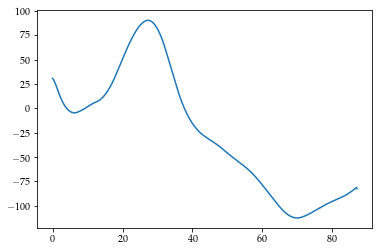

In [103]:
m=0
py.plot(lat_a,div_TE_a[0,:,m])
py.axvline(zero_div_TE[0,:-1].mean())

In [104]:
zero_div_TE

array([[ 37.68413558,  39.58302221,  42.58411097,  45.5856909 ,
         47.18814051,  47.45744411,  51.19830389,          nan,
         53.71653673,  54.46225918,  52.33380493,  44.59569256,
         37.68413558],
       [ 41.24172131,  37.89331844,  38.6741162 ,  40.08527027,
         39.96061205,  40.35722678,  43.63501595,  47.31534816,
         45.81620584,  44.62680394,  46.08011717,  44.83309869,
         41.24172131],
       [ 37.86612002,  38.277364  ,  38.13699908,  38.35372894,
         38.12812832,  37.66226119,  36.93450644,  37.26308642,
         38.00795821,  38.16461671,  38.99721389,  38.73897859,
         37.86612002],
       [ 38.54024774,  38.92873935,  39.11641391,  38.94609223,
         38.30786876,  37.12560319,  36.48561344,  36.45731004,
         37.02395923,  37.68256152,  38.49920726,  38.45211084,
         38.54024774]])

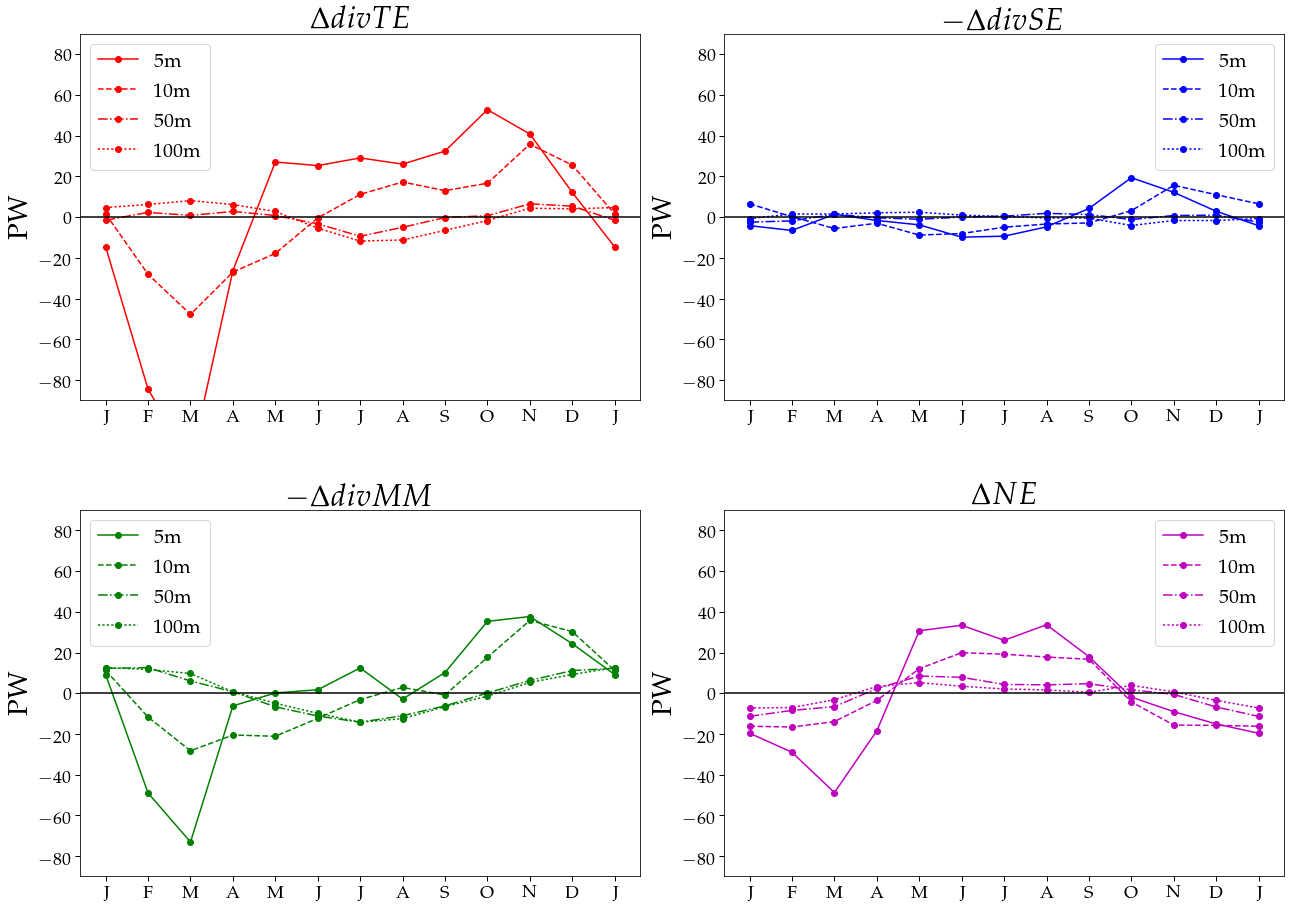

In [105]:
m_to_m=0; l=90
fig=py.figure(figsize=(22, 15))
compare_plot(1,P_div_TE,'r',r'$\Delta {divTE}$',m_to_m,l)
compare_plot(2,-P_div_SE,'b',r'$-\Delta {divSE}$',m_to_m,l)
compare_plot(3,-P_div_MM,'g',r'$-\Delta {divMM}$',m_to_m,l)
compare_plot(4,P_div_NE,'m',r'$\Delta {NE}$',m_to_m,l)

# Compare seasonality and intensity

In [93]:
def seasonality(d):
    def M(X):
        l=(X-np.nanmean(X[1:]))/np.nanmax(np.abs(X))
        return l

    fig, ax1 = py.subplots()

    ax1.plot(range(13), M(Intensity_te[d,:]), 'bo-')
    ax1.set_xlabel("Months", color='k',fontsize=20)
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel("Intensity (PW)", color='b',fontsize=20)
    ax1.tick_params(labelsize=18)

    ax2 = ax1.twinx()
    ax2.plot(range(13), M(zero_div_TE[d,:]), 'ro-')
    ax2.set_ylabel("Storm track position (deg)", color='r',fontsize=20)
    ax2.tick_params('y', colors='r')

    fig.tight_layout()
    py.show()

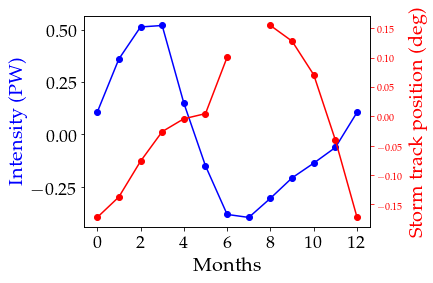

In [94]:
seasonality(0)

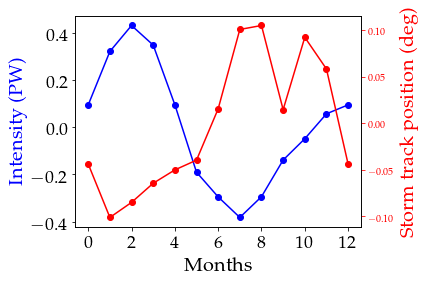

In [95]:
seasonality(1)

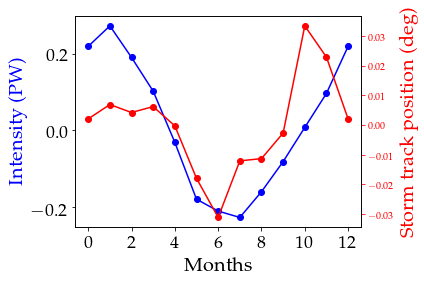

In [96]:
seasonality(2)

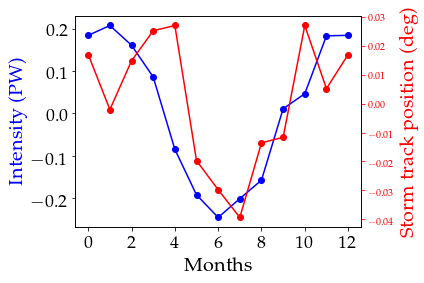

In [97]:
seasonality(3)

In [108]:
month_to_month=0
threshold_value=1
SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
#zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))


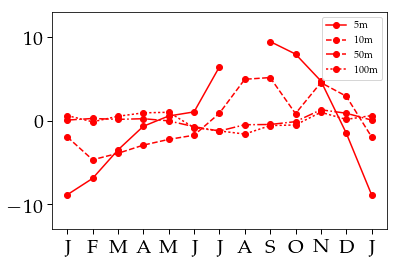

In [115]:
m=0
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro-',label='5m')
m=1
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro--',label='10m')
m=2
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro-.',label='50m')
m=3
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro:', label='100m')
py.xticks(range(13),mticks,size=20)
py.tick_params(labelsize=20,size=5,width=1)
mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
py.ylim(-13,13)
py.legend(loc='best')

In [125]:
month_to_month=0
threshold_value=1
SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))


11


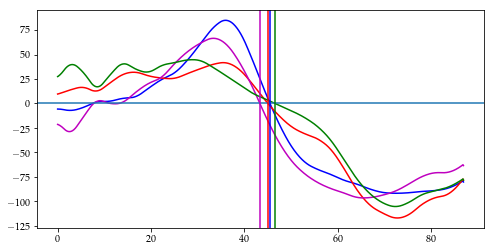

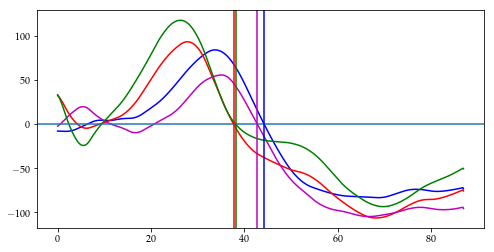

In [137]:
py.figure(1,figsize=(8,4))
m=m+1
d=0
py.plot(lat_a, SE_change[d,:,m],'b-')
py.plot(lat_a,TE_change[d,:,m],'r-')
py.plot(lat_a,NE_change[d,:,m],'m-')
py.plot(lat_a,MM_change[d,:,m],'g-')
py.axhline(0)
py.axvline(zero_div_SE[d,m],color='b')
py.axvline(zero_div_TE[d,m],color='r')
py.axvline(zero_div_MM[d,m],color='g')
py.axvline(zero_div_NE[d,m],color='m')
#py.axvline(base_pos,color='k',linewidth=5)
py.figure(2,figsize=(8,4))
py.plot(lat_a, SE_change[d,:,m+1],'b-')
py.plot(lat_a,TE_change[d,:,m+1],'r-')
py.plot(lat_a,NE_change[d,:,m+1],'m-')
py.plot(lat_a,MM_change[d,:,m+1],'g-')
py.axhline(0)
py.axvline(zero_div_SE[d,m+1],color='b')
py.axvline(zero_div_TE[d,m+1],color='r')
py.axvline(zero_div_MM[d,m+1],color='g')
py.axvline(zero_div_NE[d,m+1],color='m')
#py.axvline(base_pos,color='k',linewidth=5)
print m

In [124]:
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, 0, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))


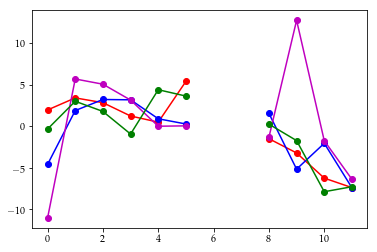

In [637]:
py.plot(zero_div_TE[0,1:]-zero_div_TE[0,:-1],'ro-')
py.plot(zero_div_SE[0,1:]-zero_div_SE[0,:-1],'bo-')
py.plot(zero_div_NE[0,1:]-zero_div_NE[0,:-1],'mo-')
py.plot(zero_div_MM[0,1:]-zero_div_MM[0,:-1],'go-')

In [517]:
month_to_month=0
threshold_value=0
SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)

zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))


In [397]:
p=TE_change[0,:,1:].mean(axis=-1)[None,:,None]
base_pos=find_zero(p)

In [398]:
t=zero_div_TE[0,:]-base_pos

In [399]:
s=zero_div_SE[0,:]-base_pos
m=zero_div_MM[0,:]-base_pos
n=zero_div_NE[0,:]-base_pos

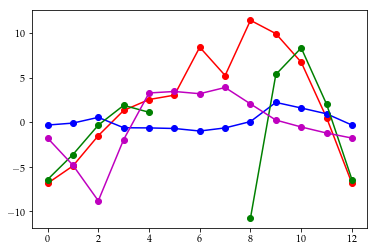

In [400]:
py.plot(t[0,:],'ro-')
py.plot(s[0,:],'bo-')
py.plot(m[0,:],'go-')
py.plot(n[0,:],'mo-')

## Try seasonal shifts averaged over months

In [792]:
def find_zero_seas(div,N=1,mean='no'):   
  if N==1 :
     l_range=((lat>=25) & (lat<=70))            
  if N==-1:
    l_range=((lat>=-70) & (lat<=-25))
  if mean == 'no' :
      zero_loc = np.zeros(np.shape(div)[-1])
      for m in range(0,np.shape(div)[-1]): 
            if N==1 :
                interpolation_function = interp1d(div[l_range,m]      ,lat[l_range]      ,kind='linear')
            if N==-1 :
                interpolation_function = interp1d(div[l_range,m][::-1],lat[l_range][::-1],kind='linear')
            try :
                zero_loc[m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[m]=np.nan
  if mean == 'yes' :                   
        interpolation_function = interp1d(div[l_range],lat[l_range],kind='linear')
        try :
            zero_loc=interpolation_function(0)
        except ValueError as err:
            zero_loc=np.nan                
  return zero_loc

In [793]:
def separate_seasons(X,MO=3):
    season=np.zeros((4,len(lat),12/MO))
    Y=np.append(X[...,-1,None],X[...,:-1],axis=-1)
    for m in range(12):
        if m%MO==0:
            season[:,:,m/MO]=Y[:,:,m:m+MO].mean(axis=-1)
    return season

In [794]:
MO=3
se=np.array(div_SE); te=np.array(div_TE); mm=np.array(div_MM); ne=np.array(div_NE)

SE_seas=separate_seasons(se,MO)
TE_seas=separate_seasons(te,MO)
MM_seas=separate_seasons(mm,MO)
NE_seas=separate_seasons(ne,MO)

IndexError: index 4 is out of bounds for axis 2 with size 4

In [796]:
def calculate_shift_just_by_adding_individual_flux_divergences(te, se, mm, ne, M):
    
    SE_change=np.zeros((4,len(lat),M+1))
    MM_change=np.zeros((4,len(lat),M+1))
    TE_change=np.zeros((4,len(lat),M+1))
    NE_change=np.zeros((4,len(lat),M+1))
    
    div_se=np.append(se,se[:,:,0,np.newaxis],axis=-1)
    div_mm=np.append(mm,mm[:,:,0,np.newaxis],axis=-1)
    div_te=np.append(te,te[:,:,0,np.newaxis],axis=-1)
    div_ne=np.append(ne,ne[:,:,0,np.newaxis],axis=-1)
    
    for month in range(0,M):

        del_div_SE1=div_se[:,:,month+1]-div_se[:,:,month]
        del_div_MM1=div_mm[:,:,month+1]-div_mm[:,:,month]
        del_div_TE1=div_te[:,:,month+1]-div_te[:,:,month]
        del_div_NE1=div_ne[:,:,month+1]-div_ne[:,:,month]
        
        SE_change[:,:,month+1]=te[:,:,month]-del_div_SE1
        MM_change[:,:,month+1]=te[:,:,month]-del_div_MM1
        TE_change[:,:,month+1]=te[:,:,month]+del_div_TE1
        NE_change[:,:,month+1]=te[:,:,month]+del_div_NE1

    SE_change[:,:,0]=SE_change[:,:,-1]
    TE_change[:,:,0]=TE_change[:,:,-1]
    MM_change[:,:,0]=MM_change[:,:,-1]
    NE_change[:,:,0]=NE_change[:,:,-1]
    return SE_change, MM_change, TE_change, NE_change

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(TE_seas, SE_seas,MM_seas, NE_seas, 12/MO)

In [808]:
d=0
zero_div_MM=find_zero_seas(MM_change[d,...],N,'no')
zero_div_SE=find_zero_seas(SE_change[d,...],N,'no')
zero_div_NE=find_zero_seas(NE_change[d,...],N,'no')

4


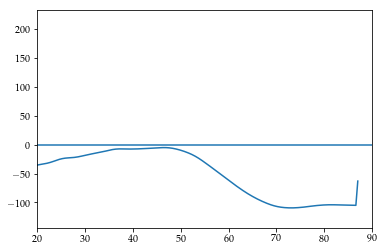

In [820]:
# py.plot(zero_div_TE,'o-')
d=0; m=m+1
if m==5: 
    m=0
py.plot(lat,NE_change[d,:,m])
py.axvline(zero_div_NE[m])
py.axhline(0)
py.xlim(20,90)
print m

In [829]:
def plot_seasonal_shift_method2(N,d,l) :
        
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    zero_div_TE=find_zero_seas(TE_change[d,...],N,'no')
    zero_div_SE=find_zero_seas(SE_change[d,...],N,'no')
    zero_div_MM=find_zero_seas(MM_change[d,...],N,'no')
    zero_div_NE=find_zero_seas(NE_change[d,...],N,'no')
    
#     if N==1 :
#         I=Intensity_teN
#     if N==-1 :
#         I=Intensity_teS
        
#     def threshold(I, pos1, pos2, pos3, pos4):
#         I=np.append(I[-1],I)
#         for m in range(13):
#             if (np.abs(I[m])<+1) :
#                 #N[d,m]=np.nan
#                 pos1[m]=np.nan
#                 pos2[m]=np.nan
#                 pos3[m]=np.nan
#                 pos4[m]=np.nan                
# #                 print ok
#         return pos1, pos2, pos3, pos4

#     zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I[d,:], zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE )
        
    final= zero_div_TE.shape[-1]
    m=range(0,final)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))

    def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y

    TE_obs         = add_month_to_end(zero_div_TE[1:]-zero_div_TE[:-1])
    SE             = add_month_to_end(zero_div_SE[1:]-zero_div_TE[:-1])
    MM             = add_month_to_end(zero_div_MM[1:]-zero_div_TE[:-1])
    NE             = add_month_to_end(zero_div_NE[1:]-zero_div_TE[:-1])
    TE_calc        = SE+MM+NE
    nonlinear_error= TE_obs-TE_calc
    
    #print TE_obs.shape

    from pandas import DataFrame
    df= DataFrame({ "shiftTE_obs": TE_obs, "shiftSE": SE , "shiftMM": MM, "shiftEI": NE, "err": nonlinear_error})
    print df

    fig=py.plot(N*TE_obs,'r.-',label=r'$\Delta\delta\: (\textrm{obs})$',linewidth=3.5,markersize=20)
    fig=py.plot(N*SE,'b.-',label=r'$\Delta\delta_{\textrm{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(N*MM,'g.-',label=r'$\Delta\delta_{\textrm{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(N*NE,'m.-',label=r'$\Delta\delta_{\textrm{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'$\textrm{error}$',linewidth=2.0,markersize=20)
    #py.legend(fontsize=28,loc='best',ncol=2)
    py.axhline(0, color='k',linewidth=1.5)
    mticks = ['DJF - SON','MAM - DJF','JJA - MAM','SON - JJA','DJF - SON']
    py.xlim(0,final-1)
    py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)
    if N==1:
        H="NH"
    else :
        H="SH"
        
    title="storm track decomposition"+" "+H+" ("+str(depth)+"m)"
    title1="stormtrack_shift_decomp_"+H+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
#     make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
#     fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
    py.show()

        err   shiftEI   shiftMM   shiftSE  shiftTE_obs
0  1.249493 -2.332672  1.360990  0.856952     1.134764
1  0.518146  0.962447 -1.305391 -0.342281    -0.167079
2  0.975953  0.266509 -2.245642 -0.737501    -1.740680
3  0.269667 -0.498063  0.958722  0.042670     0.772996
4  1.249493 -2.332672  1.360990  0.856952     1.134764


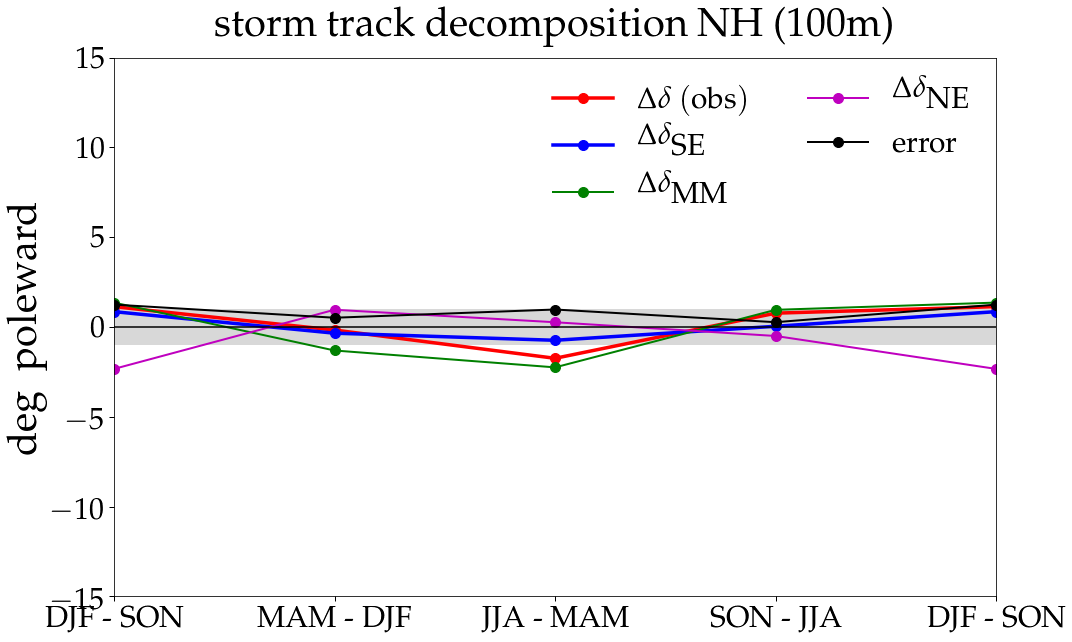

In [927]:
N=1; d=d+1; l=15;
plot_seasonal_shift_method2(N,d,l)

3


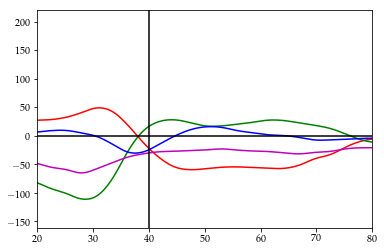

In [924]:
m=m+1

if m==3:
    
    py.plot(lat,TE_seas[d,:,0]-TE_seas[d,:,-1],'r-')
    py.plot(lat,MM_seas[d,:,0]-MM_seas[d,:,-1],'g-')
    py.plot(lat,SE_seas[d,:,0]-SE_seas[d,:,-1],'b-')
    py.plot(lat,NE_seas[d,:,0]-NE_seas[d,:,-1],'m-')
    print m    
    m=0
else :
    py.plot(lat,TE_seas[d,:,m+1]-TE_seas[d,:,m],'r-')
    py.plot(lat,MM_seas[d,:,m+1]-MM_seas[d,:,m],'g-')
    py.plot(lat,SE_seas[d,:,m+1]-SE_seas[d,:,m],'b-')
    py.plot(lat,NE_seas[d,:,m+1]-NE_seas[d,:,m],'m-')
    print m

py.xlim(20,80)
py.axvline(zero_div_TE[m],color='k')
py.axhline(0,color='k')


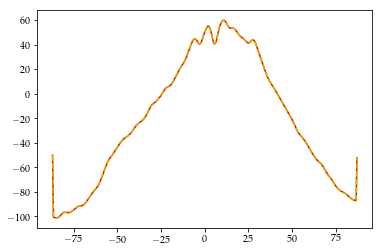

In [916]:
m=m+1
py.plot(lat,TE_seas[d,:,m]+SE_seas[d,:,m]+MM_seas[d,:,m],'r-')
py.plot(lat,NE_seas[d,:,m],'y--')

(4, 1741, 4)

In [522]:
def calculate_shift_just_by_adding_individual_flux_divergences():
    
    SE_change=np.zeros((4,len(lat),13))
    MM_change=np.zeros((4,len(lat),13))
    TE_change=np.zeros((4,len(lat),13))
    NE_change=np.zeros((4,len(lat),13))

    se=np.array(div_SE); te=np.array(div_TE); mm=np.array(div_MM); ne=np.array(div_NE)
    
    div_se=np.append(se,se[:,:,0,np.newaxis],axis=2)
    div_mm=np.append(mm,mm[:,:,0,np.newaxis],axis=2)
    div_te=np.append(te,te[:,:,0,np.newaxis],axis=2)
    div_ne=np.append(ne,ne[:,:,0,np.newaxis],axis=2)
    
    for month in range(0,12):

        del_div_SE1=div_se[:,:,month+1]-div_se[:,:,month]
        del_div_MM1=div_mm[:,:,month+1]-div_mm[:,:,month]
        del_div_TE1=div_te[:,:,month+1]-div_te[:,:,month]
        del_div_NE1=div_ne[:,:,month+1]-div_ne[:,:,month]
        
        SE_change[:,:,month+1]=te[:,:,month]-del_div_SE1
        MM_change[:,:,month+1]=te[:,:,month]-del_div_MM1
        TE_change[:,:,month+1]=te[:,:,month]+del_div_TE1
        NE_change[:,:,month+1]=te[:,:,month]+del_div_NE1

    SE_change[:,:,0]=SE_change[:,:,12]
    TE_change[:,:,0]=TE_change[:,:,12]
    MM_change[:,:,0]=MM_change[:,:,12]
    NE_change[:,:,0]=NE_change[:,:,12]
    return SE_change[...,:-1], MM_change[...,:-1], TE_change[...,:-1], NE_change[...,:-1]

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences()

In [523]:
# SE_change=np.zeros((4,len(lat),12))
# MM_change=np.zeros((4,len(lat),12))
# TE_change=np.zeros((4,len(lat),12))
# NE_change=np.zeros((4,len(lat),12))

# def calculate_changes_from_mean():
    
#     se=np.array(div_SE); te=np.array(div_TE); mm=np.array(div_MM); ne=np.array(div_NE)
    
# #     div_se=np.append(se,se[:,:,0,np.newaxis],axis=2)
# #     div_mm=np.append(mm,mm[:,:,0,np.newaxis],axis=2)
# #     div_te=np.append(te,te[:,:,0,np.newaxis],axis=2)
# #     div_ne=np.append(ne,ne[:,:,0,np.newaxis],axis=2)

#     for month in range(0,12):

#         del_div_SE1=se[:,:,month]-se.mean(axis=-1)
#         del_div_MM1=mm[:,:,month]-mm.mean(axis=-1)
#         del_div_TE1=te[:,:,month]-te.mean(axis=-1)
#         del_div_NE1=ne[:,:,month]-ne.mean(axis=-1)
        
#         SE_change[:,:,month]=te.mean(axis=-1)-del_div_SE1
#         MM_change[:,:,month]=te.mean(axis=-1)-del_div_MM1
#         TE_change[:,:,month]=te.mean(axis=-1)+del_div_TE1
#         NE_change[:,:,month]=te.mean(axis=-1)+del_div_NE1

#     return SE_change, MM_change, TE_change, NE_change

# SE_change, MM_change, TE_change, NE_change = calculate_changes_from_mean()

In [524]:
def separate_seasons(X,MO=3):
    season=np.zeros((4,len(lat),12/MO))
    Y=np.append(X[...,-1,None],X[...,:-1],axis=-1)
    for m in range(12):
        if m%MO==0:
            season[:,:,m/MO]=Y[:,:,m:m+MO].mean(axis=-1)
    return season

In [528]:
from scipy.interpolate import interp1d

def find_zero_seas(div,N=1,mean='no',MO=3):   
  if N==1 :
     l_range=((lat>=35) & (lat<=70))            
  if N==-1:
    l_range=((lat>=-70) & (lat<=-35))
  if mean == 'no' :
      zero_loc = np.zeros(12/MO)
      for m in range(0,12/MO): 
            if N==1 :
                interpolation_function = interp1d(div[l_range,m]      ,lat[l_range]      ,kind='linear')
            if N==-1 :
                interpolation_function = interp1d(div[l_range,m][::-1],lat[l_range][::-1],kind='linear')
            try :
                zero_loc[m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[m]=np.nan
  if mean == 'yes' :                   
        interpolation_function = interp1d(div[l_range],lat[l_range],kind='linear')
        try :
            zero_loc=interpolation_function(0)
        except ValueError as err:
            zero_loc=np.nan                
  return zero_loc

In [534]:
from scipy.interpolate import interp1d
def plot_shift_from_mean_method2(N,d,l,MO=3) :
               
    if d==0: depth=5
    if d==1: depth=10
    if d==2: depth=50
    if d==3: depth=100
                
    SE_seas=separate_seasons(SE_change,MO)
    TE_seas=separate_seasons(TE_change,MO)
    MM_seas=separate_seasons(MM_change,MO)
    NE_seas=separate_seasons(NE_change,MO)

    zero_div_TE=find_zero_seas(TE_seas[d,...],N,'no',MO)
    zero_div_SE=find_zero_seas(SE_seas[d,...],N,'no',MO)
    zero_div_MM=find_zero_seas(MM_seas[d,...],N,'no',MO)
    zero_div_NE=find_zero_seas(NE_seas[d,...],N,'no',MO)
     
    mean_pos_TE=find_zero_seas(TE_seas[d,...].mean(axis=-1),N,mean='yes')
    
    print mean_pos_TE
    
#     if N==1 :
#         I=Intensity_teN
#     if N==-1 :
#         I=Intensity_teS
        
#     def threshold(I, pos1, pos2, pos3, pos4):
#         I=np.append(I[-1],I)
#         for m in range(13):
#             if (np.abs(I[m])<+1) :
#                 #N[d,m]=np.nan
#                 pos1[m]=np.nan
#                 pos2[m]=np.nan
#                 pos3[m]=np.nan
#                 pos4[m]=np.nan                
#         return pos1, pos2, pos3, pos4

#     zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I[d,:], zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE )
                
    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))

    def add_month_to_end(y1) :
        y=np.append(y1,y1[0])
        return y

    TE_obs         = add_month_to_end(zero_div_TE-mean_pos_TE)
    SE             = add_month_to_end(zero_div_SE-mean_pos_TE)
    MM             = add_month_to_end(zero_div_MM-mean_pos_TE)
    NE             = add_month_to_end(zero_div_NE-mean_pos_TE)
    TE_calc        = SE+MM+NE
    nonlinear_error= TE_obs-TE_calc
    
    #print TE_obs.shape

    from pandas import DataFrame
    df= DataFrame({ "shiftTE_obs": TE_obs, "shiftSE": SE , "shiftMM": MM, "shiftEI": NE, "err": nonlinear_error})
    print df

    fig=py.plot(N*TE_obs,'r.-',label=r'$\Delta\phi_{ ({obs})}$',linewidth=3.5,markersize=20)
    fig=py.plot(N*SE,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(N*MM,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(N*NE,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    #py.legend(fontsize=28,loc='best',ncol=2)
    py.axhline(0, color='k',linewidth=1.5)
    #mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    mticks = ['D','J','F','M','A','M','J','J','A','S','O','N','D']
    #py.xlim(0,12)
 #   py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)
    if N==1:
        H="NH"
    else :
        H="SH"
        
    title="storm track decomposition"+" "+H+" ("+str(depth)+"m)"
    title1="stormtrack_shift_decomp_"+H+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    #py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
#     py.plot(range(12/MO+1),storm_pos_N[d,:]-mean_pos_TE)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
    py.show()

44.5832368526
         err   shiftEI    shiftMM    shiftSE  shiftTE_obs
0   2.164283 -2.027411  -4.009093  -0.681423    -4.553645
1   2.250054 -0.416900  -0.377296  -1.266493     0.189366
2  -2.944108  1.859409   1.965069   2.058775     2.939145
3 -16.832242  2.890546  12.812484  10.198484     9.069271
4   2.164283 -2.027411  -4.009093  -0.681423    -4.553645


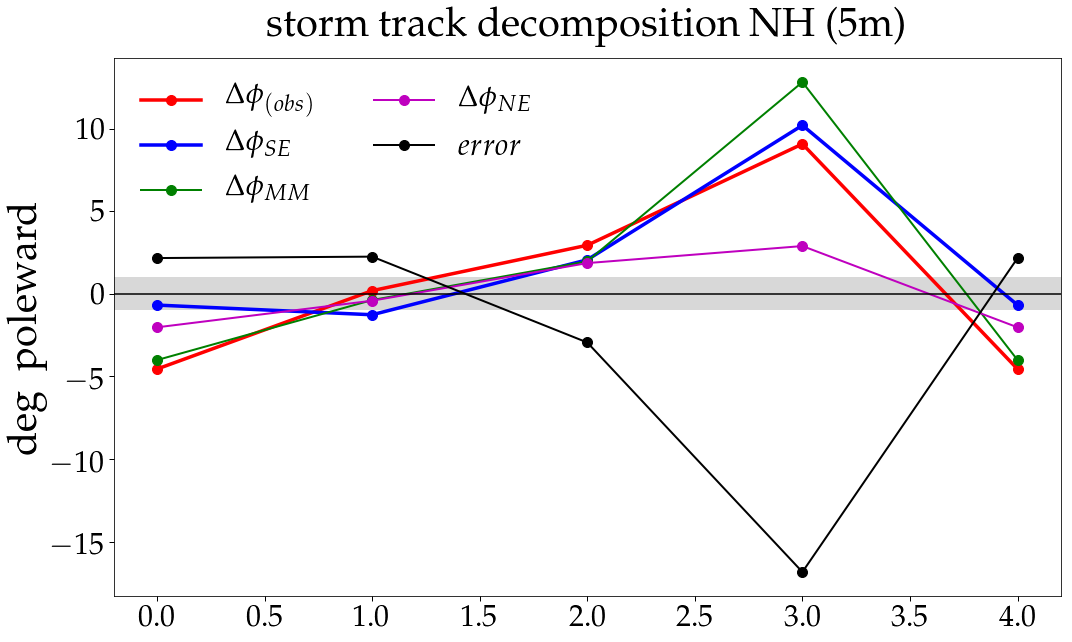

In [536]:
N=1;d=0;l=-15.5;MO=3
plot_shift_from_mean_method2(N,d,l,MO)